# 1-IMPORT DATA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import the 3 different dataset
sales = pd.read_csv('past_data/sales_model.csv')
finance = pd.read_csv('past_data/finance_model.csv')
crm = pd.read_csv('past_data/crm_model.csv')

# 2-DATA PREPARATION FOR THE MERGING

In [3]:
#We are going to use the numerical part of the ID as the common key to join the 3 datasets
# Extract the numerical part of each ID and store them in a new column
sales['ID_num_sales'] = sales['ID_SALES'].str.extract('(\d+)')
finance['ID_num_finance'] = finance['ID_FINANCE'].str.extract('(\d+)')
crm['ID_num_crm'] = crm['ID_CRM'].str.extract('(\d+)')

#If the numerical ID starts with 0, we remove it (This will allow us to avoid situations in which the ID starts with 0 in some cases and without in other. For example, the ID 0123 will be merge on the 123) )
remove_leading_zero = lambda x: x.lstrip('0')

#We create a new column with the numerical IDs without 0
sales['ID_without_zero'] = sales['ID_num_sales'].apply(remove_leading_zero)
finance['ID_without_zero'] = finance['ID_num_finance'].apply(remove_leading_zero)
crm['ID_without_zero'] = crm['ID_num_crm'].apply(remove_leading_zero)

#We transform the numerical IDs without 0 into int to sort them
sales['ID_without_zero'] = sales['ID_without_zero'].astype(int)
finance['ID_without_zero'] = finance['ID_without_zero'].astype(int)
crm['ID_without_zero'] = crm['ID_without_zero'].astype(int)

#We sort them
sales = sales.sort_values(by='ID_without_zero')
finance = finance.sort_values(by='ID_without_zero')
crm = crm.sort_values(by='ID_without_zero')

#We transform them again into a string type
sales['ID_without_zero'] = sales['ID_without_zero'].astype(str)
finance['ID_without_zero'] = finance['ID_without_zero'].astype(str)
crm['ID_without_zero'] = crm['ID_without_zero'].astype(str)

In [4]:
sales.head()

,ID_SALES,Program_Code,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Date,Return_Date,Early_RPL,...,Total_Pax,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,FPP_to_School_enrollment,Retained,ID_num_sales,ID_without_zero
1780,HD2A,HD,7.0,8.0,WA,15,A,03/31/2019,04/15/2019,04/03/2018,...,33,January,Middle,Middle,Middle->Middle,H,"0,035685008632117",1,2,2
2335,HD3T,HD,7.0,7.0,OH,14,T,05/13/2019,05/27/2019,NaN,...,75,January,Middle,Middle,Middle->Middle,H,"0,087638079913524",1,3,3
673,HC4A,HC,9.0,9.0,HI,50,A,06/08/2019,07/28/2019,NaN,...,33,January,K,High,K->High,H,"0,008791541187715",1,4,4
696,HC6A,HC,6.0,8.0,OK,23,A,06/08/2019,07/01/2019,NaN,...,28,January,PK,Middle,PK->Middle,H,"0,027577447344281",0,6,6
3063,HD7A,HD,8.0,9.0,MN,11,A,06/01/2019,06/12/2019,04/05/2018,...,19,January,Middle,High,Middle->High,H,"0,035619156505107",1,7,7


In [5]:
finance.head()

,ID_FINANCE,Deposit_Date,Special_Pay,Tuition,FRP_Active,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,School_Sponsor,SPR_Group_Revenue,FPP_to_PAX,Num_of_Non_FPP_PAX,ID_num_finance,ID_without_zero
1373,NA2,11/26/2018,NaN,2247,22,7,"0,685584013472846","0,239541525374483",0,1980,"0,896531869937648",3,2,2
2108,NA3,11/22/2018,NaN,793,37,3,"0,486236650766944","0,246876182527485",0,655,"0,925198672883157",5,3,3
2847,NA4,12/22/2018,NaN,4299,22,1,"0,812578111362171","0,112749535182843",0,4610,"0,902050827471847",3,4,4
588,FR6,10/21/2018,FR,1803,14,1,"0,534473420451928","0,095711787201642",0,1847,"0,881257114226344",3,6,6
3743,NA7,09/29/2018,NaN,1371,9,0,"0,499985516706508","0,276102610795288",0,1340,"0,907637107564303",2,7,7


In [6]:
crm.head()

,ID_CRM,Poverty_Code,Region,CRM_Segment,School_Type,Parent_Meeting_Flag,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,Income_Level,...,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,ID_num_crm,ID_without_zero
2246,B2G,B,Pacific Northwest,5.0,PUBLIC,1,6,8.0,935,G,...,10/08/2018,10/07/2018,174.0,175.0,Middle,Middle,Middle->Middle,L,2,2
2612,B3N,B,Other,10.0,PUBLIC,0,6,8.0,791,N,...,NaN,NaN,NaN,NaN,Middle,Middle,Middle->Middle,L,3,3
930,04L,0,Other,5.0,Private non-Christian,0,K,12.0,3745,L,...,NaN,NaN,NaN,NaN,Middle,Middle,Middle->Middle,L,04,4
3994,C6Z,C,Other,9.0,PUBLIC,1,PK,8.0,945,Z,...,10/01/2018,09/29/2018,250.0,252.0,Middle,Middle,Middle->Middle,L,6,6
3085,B7I,B,Other,10.0,PUBLIC,1,7,12.0,549,I,...,05/20/2018,09/08/2018,377.0,266.0,Middle,High,Middle->High,S-M,7,7


In [7]:
sales.shape

(4153, 26)

In [8]:
finance.shape

(4151, 14)

In [9]:
crm.shape

(4148, 22)

# 3-MERGING OF THE 3 DATASETS

In [10]:
#We carry out the merging through an inner join, that is only the IDs that are in common in the 3 datasets will be merged
df0 = pd.merge(sales, finance, on='ID_without_zero', how='inner') #We first merge sales and finance
df = pd.merge(df0, crm, on='ID_without_zero', how='inner') #Secondly we merge with crm
df.head()

,ID_SALES,Program_Code,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Date,Return_Date,Early_RPL,...,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,ID_num_crm
0,HD2A,HD,7.0,8.0,WA,15,A,03/31/2019,04/15/2019,04/03/2018,...,1,10/08/2018,10/07/2018,174.0,175.0,Middle,Middle,Middle->Middle,L,2
1,HD3T,HD,7.0,7.0,OH,14,T,05/13/2019,05/27/2019,NaN,...,0,NaN,NaN,NaN,NaN,Middle,Middle,Middle->Middle,L,3
2,HC4A,HC,9.0,9.0,HI,50,A,06/08/2019,07/28/2019,NaN,...,0,NaN,NaN,NaN,NaN,Middle,Middle,Middle->Middle,L,04
3,HC6A,HC,6.0,8.0,OK,23,A,06/08/2019,07/01/2019,NaN,...,1,10/01/2018,09/29/2018,250.0,252.0,Middle,Middle,Middle->Middle,L,6
4,HD7A,HD,8.0,9.0,MN,11,A,06/01/2019,06/12/2019,04/05/2018,...,2,05/20/2018,09/08/2018,377.0,266.0,Middle,High,Middle->High,S-M,7


In [11]:
df.shape #After the merging, the merged dataset is made of 4056 rows and 60 columns

(4056, 60)

In [12]:
#We drop the columns that we don´t need anymore, these are the initial IDs and the numerical IDs but with the 0's of the 3 datasets
df = df.drop(['ID_SALES','ID_num_sales','ID_FINANCE','ID_num_finance','ID_CRM','ID_num_crm'], axis = 1)

#We place the final ID column at the beginning of the dataset, and the target column at the end
col = df.pop('ID_without_zero')
df.insert(0, 'ID_without_zero', col)
df = df.rename(columns={'ID_without_zero':'final_ID'}) 
col1 = df.pop('Retained')
df.insert(len(df.columns), 'Retained', col1)

In [13]:
df.head()

,final_ID,Program_Code,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Date,Return_Date,Early_RPL,...,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,Retained
0,2,HD,7.0,8.0,WA,15,A,03/31/2019,04/15/2019,04/03/2018,...,1,10/08/2018,10/07/2018,174.0,175.0,Middle,Middle,Middle->Middle,L,1
1,3,HD,7.0,7.0,OH,14,T,05/13/2019,05/27/2019,NaN,...,0,NaN,NaN,NaN,NaN,Middle,Middle,Middle->Middle,L,1
2,4,HC,9.0,9.0,HI,50,A,06/08/2019,07/28/2019,NaN,...,0,NaN,NaN,NaN,NaN,Middle,Middle,Middle->Middle,L,1
3,6,HC,6.0,8.0,OK,23,A,06/08/2019,07/01/2019,NaN,...,1,10/01/2018,09/29/2018,250.0,252.0,Middle,Middle,Middle->Middle,L,0
4,7,HD,8.0,9.0,MN,11,A,06/01/2019,06/12/2019,04/05/2018,...,2,05/20/2018,09/08/2018,377.0,266.0,Middle,High,Middle->High,S-M,1


In [14]:
print("\n".join(df.columns))

final_ID
Program_Code
From_Grade
To_Grade
Group_State
Days
Travel_Type
Departure_Date
Return_Date
Early_RPL
Latest_RPL
Cancelled_Pax
Total_Discount_Pax
Initial_System_Date
SPR_Product_Type
FPP
Total_Pax
DepartureMonth
GroupGradeTypeLow
GroupGradeTypeHigh
GroupGradeType
MajorProgramCode
FPP_to_School_enrollment
Deposit_Date
Special_Pay
Tuition
FRP_Active
FRP_Cancelled
FRP_Take_up_percent_
EZ_Pay_Take_Up_Rate
School_Sponsor
SPR_Group_Revenue
FPP_to_PAX
Num_of_Non_FPP_PAX
Poverty_Code
Region
CRM_Segment
School_Type
Parent_Meeting_Flag
MDR_Low_Grade
MDR_High_Grade
Total_School_Enrollment
Income_Level
SPR_New_Existing
NumberOfMeetingswithParents
FirstMeeting
LastMeeting
DifferenceTraveltoFirstMeeting
DifferenceTraveltoLastMeeting
SchoolGradeTypeLow
SchoolGradeTypeHigh
SchoolGradeType
SchoolSizeIndicator
Retained


# 4-DATA PREPROCESSING 

In [15]:
#First, we convert all the date columns to datetime format
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])
df['Return_Date'] = pd.to_datetime(df['Return_Date'])
df['Early_RPL'] = pd.to_datetime(df['Early_RPL'])
df['Latest_RPL'] = pd.to_datetime(df['Latest_RPL'])
df['Initial_System_Date'] = pd.to_datetime(df['Initial_System_Date'])
df['Deposit_Date'] = pd.to_datetime(df['Deposit_Date'])
df['FirstMeeting'] = pd.to_datetime(df['FirstMeeting'])
df['LastMeeting'] = pd.to_datetime(df['LastMeeting'])

In [16]:
#For the simplicity of the model, we have decided to use the months of the departure and return date, instead of the complete date
df['Departure_Month'] = df['Departure_Date'].dt.month
df['Return_Month'] = df['Return_Date'].dt.month

#It is also worth mentioning that the dataset already contains a column that reflects the Departure Month, however that column has
#a lot of mistakes, so we will drop it and replace it with this new one

In [17]:
#We are also going to create 4 different columns because to avoid having dates, we will work with the days between the different dates of the dataset and the departure date
df['Days_LCtoDD'] = (df['Departure_Date'] - df['Latest_RPL']).dt.days #This column reflects the number of days between the last communication of the trip and the departure date
df['Days_InitialOrgtoDD'] = (df['Departure_Date'] - df['Initial_System_Date']).dt.days #This column reflects the number of days between the date when the trip was organized and the departure date
df['Days_DeptoDD'] = (df['Departure_Date'] - df['Deposit_Date']).dt.days #This columns reflects the number of days between the deposit date and the departure date
df['Early_C'] = df['Early_RPL'].notna().astype(int) #This column is a flag that indicates whether there has been two communications or not. 1 for two communications, 0 for one communications 

In [18]:
#We place the recently created columns in the position where they belong
col1 = df.pop('Early_C')
col2 = df.pop('Days_LCtoDD')
col3 = df.pop('Days_InitialOrgtoDD')
col4 = df.pop('Departure_Month')
col5 = df.pop('Return_Month')
col6 = df.pop('Days_DeptoDD')
df.insert(9, 'Early_C', col1)
df.insert(10, 'Days_LCtoDD', col2)
df.insert(15, 'Days_InitialOrgtoDD', col3)
df.insert(7, 'Departure_Month', col4)
df.insert(8, 'Return_Month', col5)
df.insert(29, 'Days_DeptoDD', col6)

In [19]:
#We drop the columns that we are not going to use since they are useless for the model, have a lot of null values (Special_Pay) or have been transformed (like in the case of dates in which we have obtain the days between the date and the departure date)
df = df.drop(['Program_Code','Departure_Date','Return_Date','Deposit_Date',
              'Early_RPL','Latest_RPL','Initial_System_Date','DepartureMonth',
              'GroupGradeTypeLow','GroupGradeTypeHigh','MajorProgramCode','Deposit_Date',
              'Region','CRM_Segment','Parent_Meeting_Flag','FirstMeeting',
              'LastMeeting','SchoolGradeTypeLow','SchoolGradeTypeHigh'],axis =1)

#We consider that Program_Code, MajorProgramCode and CRM_Segment are not relevant for the model
#We also drop Departure_Date, Return_Date, Deposit_Date, Early_RPL, Latest_RPL, Initial_System_Date, FirstMeeting, LastMeeting and Deposit_Date because we are going to work with the days between these dates and the departure date, and not with the dates
#Since we have the combination of SchoolGradeTypeLow and SchoolGradeTypeHigh in one column, we drop both. Same for GroupGradeTypeLow and GroupGradeTypeHigh 
#As we have commented before, DepartureMonth is full of errors, so we create a new one with the correct values (Departure_Month)
#Parent_Meeting_Flag is redundant since we have another column with the number of meeting with the parents and the dates, so we drop it as well. Same for Region


In [20]:
df.shape

(4056, 42)

## 4.1-Duplicates

In [21]:
df[df.duplicated()] #We check which are the rows that are duplicates

,final_ID,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Month,Return_Month,Early_C,Days_LCtoDD,...,MDR_High_Grade,Total_School_Enrollment,Income_Level,SPR_New_Existing,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeType,SchoolSizeIndicator,Retained


There are no duplicates

## 4.2-Missing values

The strategy followed to deal with the null values is the following:

- We are going to drop the columns that have a number of null values larger than the 15% of the total rows of the dataset.
- After dropping these columns, we will remove the rows that contain the rest of null values.
   
Considering this and the number of null values per column, we will drop the 'Special_Pay' column since it has a lot of null values (more than the 15%). For the rest of null values, we will remove the rows with at least one null value.

However, there are two columns that contain null values but that actually are not null values. These columns are
'DifferenceTraveltoFirstMeeting' and 'DifferenceTraveltoLastMeeting'. Having a null value in these columns means that for this trip there aren't any parent meeting organized and this is important, so to avoid losing these values, we are going to replace them with a 0. 

In [22]:
df.isna().any() #We check if there is any null value on each column 

final_ID                          False
From_Grade                         True
To_Grade                           True
Group_State                       False
Days                              False
Travel_Type                       False
Departure_Month                   False
Return_Month                      False
Early_C                           False
Days_LCtoDD                        True
Cancelled_Pax                     False
Total_Discount_Pax                False
Days_InitialOrgtoDD                True
SPR_Product_Type                  False
FPP                               False
Total_Pax                         False
GroupGradeType                    False
FPP_to_School_enrollment           True
Days_DeptoDD                      False
Special_Pay                        True
Tuition                           False
FRP_Active                        False
FRP_Cancelled                     False
FRP_Take_up_percent_              False
EZ_Pay_Take_Up_Rate               False


In [23]:
df.isnull().sum() #We obtain the total number of null values per column

final_ID                             0
From_Grade                         203
To_Grade                           246
Group_State                          0
Days                                 0
Travel_Type                          0
Departure_Month                      0
Return_Month                         0
Early_C                              0
Days_LCtoDD                         24
Cancelled_Pax                        0
Total_Discount_Pax                   0
Days_InitialOrgtoDD                 16
SPR_Product_Type                     0
FPP                                  0
Total_Pax                            0
GroupGradeType                       0
FPP_to_School_enrollment            55
Days_DeptoDD                         0
Special_Pay                       3261
Tuition                              0
FRP_Active                           0
FRP_Cancelled                        0
FRP_Take_up_percent_                 0
EZ_Pay_Take_Up_Rate                  0
School_Sponsor           

In [24]:
df = df.drop(['Special_Pay'], axis =1)

df["DifferenceTraveltoFirstMeeting"].fillna(0, inplace=True)
df["DifferenceTraveltoLastMeeting"].fillna(0, inplace=True)

In [25]:
df.dropna(inplace=True) #We drop all the rows that contains at least one of the rest of missing values

In [26]:
#Now that we have drop all the missing data, we can perform the transformations needed for each column
df['final_ID'] = df['final_ID'].astype('object')
df['Early_C'] = df['Early_C'].astype('object')
df['Days_LCtoDD'] = df['Days_LCtoDD'].astype('int64')
df['Days_InitialOrgtoDD'] = df['Days_InitialOrgtoDD'].astype('int64')
df['DifferenceTraveltoFirstMeeting'] = df['DifferenceTraveltoFirstMeeting'].astype('int64')
df['DifferenceTraveltoLastMeeting'] = df['DifferenceTraveltoLastMeeting'].astype('int64')
df['From_Grade'] = df['From_Grade'].astype('int64')
df['From_Grade'] = df['From_Grade'].astype('object')
df['To_Grade'] = df['To_Grade'].astype('int64')
df['To_Grade'] = df['To_Grade'].astype('object')
df['MDR_High_Grade'] = df['MDR_High_Grade'].astype('int64')
df['MDR_High_Grade'] = df['MDR_High_Grade'].astype('object')
df['School_Sponsor'] = df['School_Sponsor'].astype('object')
df['SPR_New_Existing'] = df['SPR_New_Existing'].astype('object')
df['NumberOfMeetingswithParents'] = df['NumberOfMeetingswithParents'].astype('object')

In [27]:
df['FPP_to_School_enrollment'] = df['FPP_to_School_enrollment'].str.replace(',', '.').astype('float64')
df['FRP_Take_up_percent_'] = df['FRP_Take_up_percent_'].str.replace(',', '.').astype('float64')
df['EZ_Pay_Take_Up_Rate'] = df['EZ_Pay_Take_Up_Rate'].str.replace(',', '.').astype('float64')
df['FPP_to_PAX'] = df['FPP_to_PAX'].str.replace(',', '.').astype('float64')

In [28]:
df.dtypes

final_ID                           object
From_Grade                         object
To_Grade                           object
Group_State                        object
Days                                int64
Travel_Type                        object
Departure_Month                     int32
Return_Month                        int32
Early_C                            object
Days_LCtoDD                         int64
Cancelled_Pax                       int64
Total_Discount_Pax                  int64
Days_InitialOrgtoDD                 int64
SPR_Product_Type                   object
FPP                                 int64
Total_Pax                           int64
GroupGradeType                     object
FPP_to_School_enrollment          float64
Days_DeptoDD                        int32
Tuition                             int64
FRP_Active                          int64
FRP_Cancelled                       int64
FRP_Take_up_percent_              float64
EZ_Pay_Take_Up_Rate               

In [29]:
df.head()

,final_ID,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Month,Return_Month,Early_C,Days_LCtoDD,...,MDR_High_Grade,Total_School_Enrollment,Income_Level,SPR_New_Existing,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeType,SchoolSizeIndicator,Retained
0,2,7,8,WA,15,A,3,4,1,209,...,8,935,G,1,1,174,175,Middle->Middle,L,1
1,3,7,7,OH,14,T,5,5,0,192,...,8,791,N,1,0,0,0,Middle->Middle,L,1
2,4,9,9,HI,50,A,6,7,0,172,...,12,3745,L,1,0,0,0,Middle->Middle,L,1
3,6,6,8,OK,23,A,6,7,0,245,...,8,945,Z,1,1,250,252,Middle->Middle,L,0
4,7,8,9,MN,11,A,6,6,1,231,...,12,549,I,1,2,377,266,Middle->High,S-M,1


## 4.3-Inconsistent data

In [30]:
df = df.loc[df['Days_LCtoDD'] >= 0] #Drop the rows in which the values of Days_LCtoDD are negative
df = df.loc[df['Days_InitialOrgtoDD'] >= 0] #Drop the rows in which the values of Days_InitialOrgtoDD are negative
df = df.loc[df['DifferenceTraveltoFirstMeeting'] >= 0] #Drop the rows in which the values of DifferenceTraveltoFirstMeeting are negative
df = df.loc[df['DifferenceTraveltoLastMeeting'] >= 0] #Drop the rows in which the values of DifferenceTraveltoLastMeeting are negative
df = df.loc[df['FPP_to_School_enrollment'] <= 1] # Drop the rows in which the values of FPP_to_School_enrollment are larger than 1
df = df.loc[df['Days_DeptoDD'] >= 0] #Drop the rows in which the values of Days_DeptotoDD are negative
df = df.loc[df['FRP_Take_up_percent_'] <= 1] # Drop the rows in which the values of FRP_Take_up_percent_ are larger than 1
df = df.loc[df['EZ_Pay_Take_Up_Rate'] <= 1] # Drop the rows in which the values of EZ_Pay_Take_Up_Rate are larger than 1
df = df.loc[df['FPP_to_PAX'] <= 1] # Drop the rows in which the values of FPP_to_PAX are larger than 1

In [31]:
df.shape #After the data preprocessing, we end up having a dataset with 3589 rows and 41 columns

(3589, 41)

In [32]:
df.to_csv('final.csv',index=False)

# 5-EDA

In [33]:
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
X=df.iloc[:,:-1] #explanatory features
y=df['Retained'] #target

In [35]:
from sklearn.model_selection import train_test_split

#We split the data into train and test set to train and evaluate the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.25, #by default is 75%-25% #30% of the test data. The selection of rows is made randonmly
                                                    stratify=y, #preserve target proportions, same proportion of 1's and 0's
                                                    random_state= 321) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(2691, 40) (898, 40)


## 5.1-Split categorical/continuos variables

In [36]:
X_train.dtypes

final_ID                           object
From_Grade                         object
To_Grade                           object
Group_State                        object
Days                                int64
Travel_Type                        object
Departure_Month                     int32
Return_Month                        int32
Early_C                            object
Days_LCtoDD                         int64
Cancelled_Pax                       int64
Total_Discount_Pax                  int64
Days_InitialOrgtoDD                 int64
SPR_Product_Type                   object
FPP                                 int64
Total_Pax                           int64
GroupGradeType                     object
FPP_to_School_enrollment          float64
Days_DeptoDD                        int32
Tuition                             int64
FRP_Active                          int64
FRP_Cancelled                       int64
FRP_Take_up_percent_              float64
EZ_Pay_Take_Up_Rate               

In [37]:
#We will slit the dataset into numerical and categorical in order to obtain the dummies of the categorical variables and to perform the standardization of the numerical ones
X_train_categorical=X_train.select_dtypes(include=['object']) #selecting the columns that are of type object(categorical)
X_test_categorical=X_test.select_dtypes(include=['object']) #we have to do the same for the test data. This is important!! All the processess developed in the train data must be done as well in the test data 
X_train_numerical=X_train.select_dtypes(include=[np.number]) #selecting the columns that are numerical
X_test_numerical=X_test.select_dtypes(include=[np.number])

In [38]:
print(X_train_numerical.shape, X_train_categorical.shape) #We have 22 numerical variables and 18 categorical

(2691, 22) (2691, 18)


In [39]:
print(X_test_numerical.shape, X_test_categorical.shape)

(898, 22) (898, 18)


## 5.2-Dealing with the categorical variables

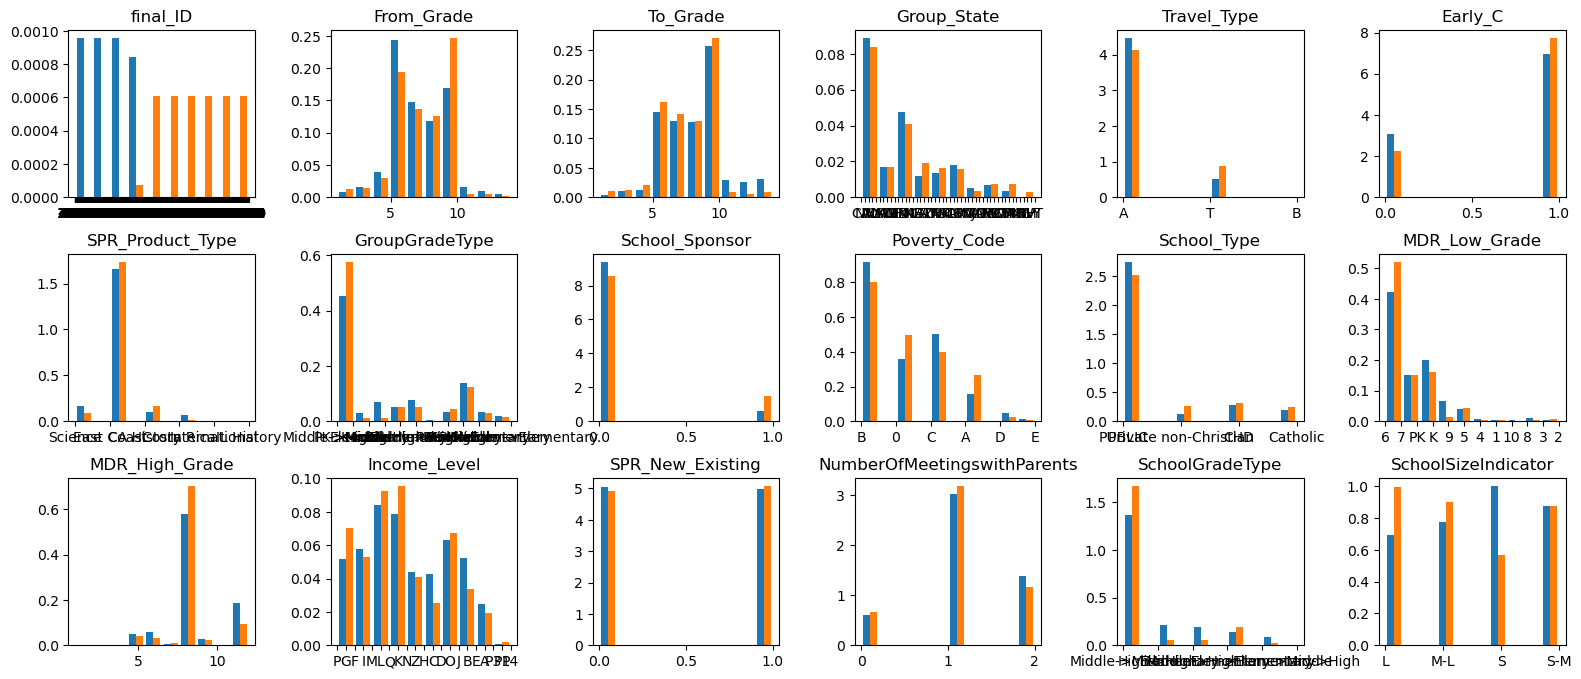

In [42]:
df_0=X_train_categorical[y_train==0] # Rows with target==0
df_1=X_train_categorical[y_train==1] # Rows with target==1


fig, axes = plt.subplots(3, 6,figsize=[16,7])
axes = axes.flatten()
fig.tight_layout(pad=2)

i=0
for x in X_train_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

#Blue is 0; Orange is 1
#Since final_ID, SPR_New_Existing are not relevant, we are dropping them -> These columns don't allow us to distinguish between 0's and 1's

In [43]:
from sklearn.preprocessing import OneHotEncoder

#We select all the categorical variables except 'final_ID' and 'SPR_New_Existing'
selection_categorical=['From_Grade','To_Grade','Group_State','Travel_Type','Early_C','SPR_Product_Type', 
                       'GroupGradeType', 'School_Sponsor','Poverty_Code','School_Type','MDR_Low_Grade',
                       'MDR_High_Grade','Income_Level','SchoolGradeType','SchoolSizeIndicator',
                       'NumberOfMeetingswithParents']

#We create the dummies through OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_categorical[selection_categorical])  #Important! We are enconding the train data
columns_dummies=encoder.get_feature_names_out()
dummies_train = encoder.transform(X_train_categorical[selection_categorical]).toarray()
dummies_test = encoder.transform(X_test_categorical[selection_categorical]).toarray()

In [44]:
dummies_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [45]:
dummies_train=pd.DataFrame(dummies_train,columns=columns_dummies)
dummies_test=pd.DataFrame(dummies_test,columns=columns_dummies)

In [46]:
dummies_train.head()

,From_Grade_1,From_Grade_2,From_Grade_3,From_Grade_4,From_Grade_5,From_Grade_6,From_Grade_7,From_Grade_8,From_Grade_9,From_Grade_10,...,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolSizeIndicator_L,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S,SchoolSizeIndicator_S-M,NumberOfMeetingswithParents_0,NumberOfMeetingswithParents_1,NumberOfMeetingswithParents_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [47]:
dummies_train.shape

(2691, 168)

In [48]:
dummies_test.shape

(898, 168)

In [49]:
#Save the encoder. We save the encoder into a pickle file so in the future when new data arrives, we can reuse the encoder
import pickle  
pickle.dump(encoder, open('encoder.pkl', 'wb')) 

## 5.3-Dealing with the numerical variables

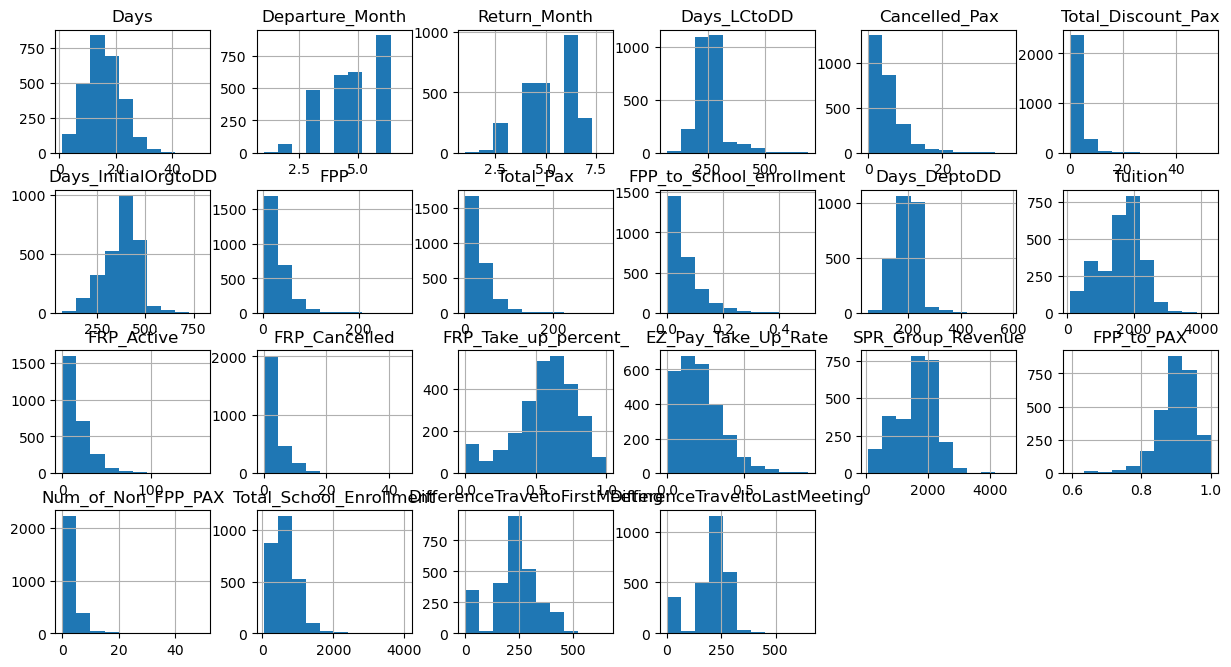

In [50]:
df_hist=X_train_numerical.hist(layout=(6,6), figsize=(15,12))

In [51]:
#We are going to apply a log transformation to the numerical variables that are right skewed

import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

X_train_numerical['logCancelled_Pax']=X_train_numerical['Cancelled_Pax'].apply(lambda x: math.log(x+1))
X_train_numerical['logTotal_Discount_Pax']=X_train_numerical['Total_Discount_Pax'].apply(lambda x: math.log(x+1))
X_train_numerical['logFPP']=X_train_numerical['FPP'].apply(lambda x: math.log(x+1))
X_train_numerical['logTotal_Pax']=X_train_numerical['Total_Pax'].apply(lambda x: math.log(x+1))
X_train_numerical['logFPP_to_School_enrollment']=X_train_numerical['FPP_to_School_enrollment'].apply(lambda x: math.log(x+1))
X_train_numerical['logFRP_Active']=X_train_numerical['FRP_Active'].apply(lambda x: math.log(x+1))
X_train_numerical['logFRP_Cancelled']=X_train_numerical['FRP_Cancelled'].apply(lambda x: math.log(x+1))
X_train_numerical['logEZ_Pay_Take_Up_Rate']=X_train_numerical['EZ_Pay_Take_Up_Rate'].apply(lambda x: math.log(x+1))
X_train_numerical['logNum_of_Non_FPP_PAX']=X_train_numerical['Num_of_Non_FPP_PAX'].apply(lambda x: math.log(x+1))
X_train_numerical['logTotal_School_Enrollment']=X_train_numerical['Total_School_Enrollment'].apply(lambda x: math.log(x+1))

#We drop the columns to which we have applied the log transformation because we are not going to use them anymore
X_train_numerical.drop(columns=['Cancelled_Pax','Total_Discount_Pax','FPP','Total_Pax','FPP_to_School_enrollment',
                                'FRP_Active','FRP_Cancelled','EZ_Pay_Take_Up_Rate','Num_of_Non_FPP_PAX',
                                'Total_School_Enrollment'],inplace=True)

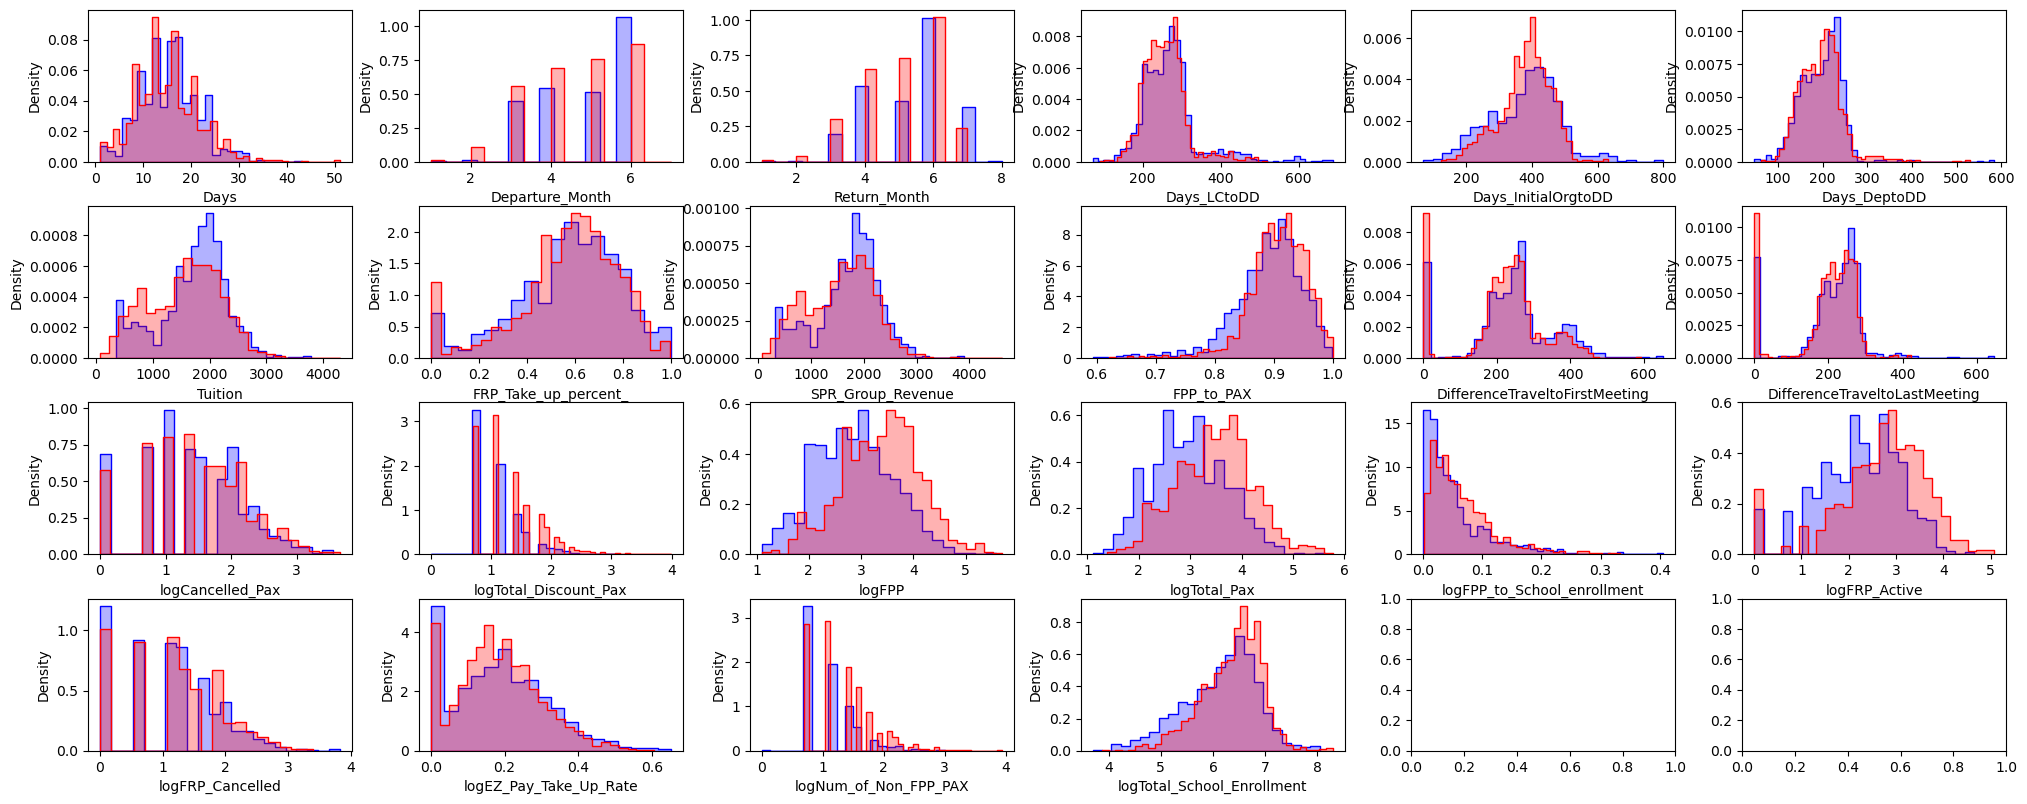

In [52]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


X0 = X_train_numerical[y_train==0]
X1 = X_train_numerical[y_train==1]

fig, axes = plt.subplots(ncols=6, nrows=4, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(X_train_numerical.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

#Blue is 0 and Red is 1
#In this case, since we are not sure about which are the most relevant numerical variables, we keep all of them

In [53]:
#Now, we need to perform the same changes and transformations made on the train set to the TEST SET:

X_test_numerical['logCancelled_Pax']=X_test_numerical['Cancelled_Pax'].apply(lambda x: math.log(x+1))
X_test_numerical['logTotal_Discount_Pax']=X_test_numerical['Total_Discount_Pax'].apply(lambda x: math.log(x+1))
X_test_numerical['logFPP']=X_test_numerical['FPP'].apply(lambda x: math.log(x+1))
X_test_numerical['logTotal_Pax']=X_test_numerical['Total_Pax'].apply(lambda x: math.log(x+1))
X_test_numerical['logFPP_to_School_enrollment']=X_test_numerical['FPP_to_School_enrollment'].apply(lambda x: math.log(x+1))
X_test_numerical['logFRP_Active']=X_test_numerical['FRP_Active'].apply(lambda x: math.log(x+1))
X_test_numerical['logFRP_Cancelled']=X_test_numerical['FRP_Cancelled'].apply(lambda x: math.log(x+1))
X_test_numerical['logEZ_Pay_Take_Up_Rate']=X_test_numerical['EZ_Pay_Take_Up_Rate'].apply(lambda x: math.log(x+1))
X_test_numerical['logNum_of_Non_FPP_PAX']=X_test_numerical['Num_of_Non_FPP_PAX'].apply(lambda x: math.log(x+1))
X_test_numerical['logTotal_School_Enrollment']=X_test_numerical['Total_School_Enrollment'].apply(lambda x: math.log(x+1))


X_test_numerical.drop(columns=['Cancelled_Pax','Total_Discount_Pax','FPP','Total_Pax','FPP_to_School_enrollment','FRP_Active','FRP_Cancelled','EZ_Pay_Take_Up_Rate','Num_of_Non_FPP_PAX','Total_School_Enrollment'],inplace=True)

<AxesSubplot:>

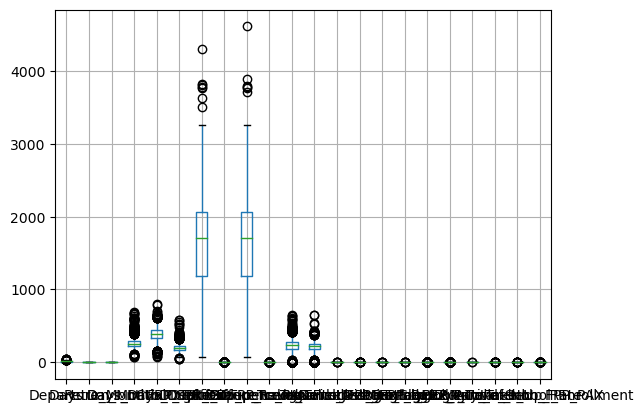

In [54]:
X_train_numerical.boxplot()

As we can see in the boxplot of the numerical variables, the ranges are very different among them, we have to be careful to make comparable all the variables, that’s why we are going to perform the data standardization

### 5.3.1-Standardization

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler().fit(X_train_numerical)
X_train_numerical_scaled=pd.DataFrame(scaler.transform(X_train_numerical))
X_test_numerical_scaled=pd.DataFrame(scaler.transform(X_test_numerical))

X_train_numerical_scaled.columns = X_train_numerical.columns
X_test_numerical_scaled.columns = X_test_numerical.columns

In [57]:
# Save the scaler. We need to save the scaler in order to apply it to the future data
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb')) 

<AxesSubplot:>

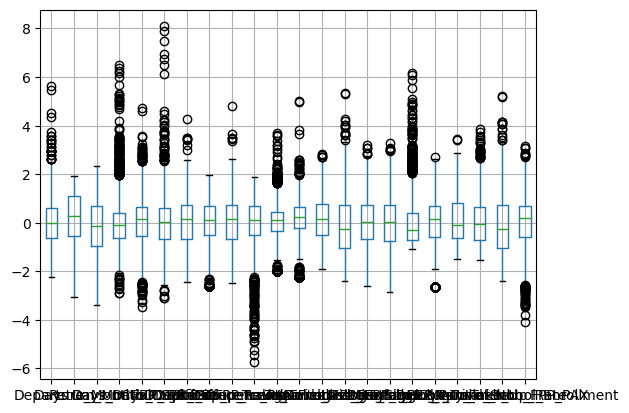

In [58]:
X_train_numerical_scaled.boxplot()

Now the ranges of the different numerical variables are comparable among them

In [59]:
print(X_train_numerical.shape, X_train_numerical_scaled.shape)

(2691, 22) (2691, 22)


In [60]:
print(X_test_numerical.shape, X_test_numerical_scaled.shape)

(898, 22) (898, 22)


In [61]:
print(dummies_train.shape, dummies_test.shape)

(2691, 168) (898, 168)


## 5.4-Final Datasets

In [62]:
#We need to combine the scaled numerical variables and the numerical version of the categorical columns (dummies), that is everything we've done before 
X_train=pd.concat([dummies_train,X_train_numerical_scaled], axis=1)
X_test=pd.concat([dummies_test,X_test_numerical_scaled], axis=1)

In [63]:
X_train.head()

,From_Grade_1,From_Grade_2,From_Grade_3,From_Grade_4,From_Grade_5,From_Grade_6,From_Grade_7,From_Grade_8,From_Grade_9,From_Grade_10,...,logCancelled_Pax,logTotal_Discount_Pax,logFPP,logTotal_Pax,logFPP_to_School_enrollment,logFRP_Active,logFRP_Cancelled,logEZ_Pay_Take_Up_Rate,logNum_of_Non_FPP_PAX,logTotal_School_Enrollment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.160251,-1.040757,-0.502575,-0.656644,-0.838720,-0.595073,0.274011,-0.569602,-1.048687,1.129997
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.129157,-1.040757,-0.671989,-0.431869,-0.708847,0.134081,0.562511,-0.643706,-1.048687,0.276937
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.160251,-1.040757,-1.232549,-1.146733,-0.950619,-0.757231,0.274011,0.073075,-1.048687,1.084892
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.396714,-2.384034,-2.626375,-2.846159,-1.054169,-1.486385,0.997532,-1.524673,-2.393839,0.482526
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.028139,-0.254990,-0.353142,-0.072913,-0.543665,0.338323,-1.518313,-0.013658,-0.261823,0.384243


In [64]:
X_train.shape

(2691, 190)

In [65]:
X_test.shape

(898, 190)

# 6-MODELLING 

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import metrics
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
#Definition of the function that is going to allow us performing a GridSearch among all the possible models in order to use hyperparameter tuning
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1) #We are also using Cross-Validation of 3 partitions
    
    tic = time.perf_counter()
    gs = gs.fit(X_train, y_train)
    toc = time.perf_counter()

    print("f1_train: %f using %s in %.3f seconds" % (gs.best_score_, gs.best_params_,toc - tic))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("           train    test ") 
    print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
    print("accuracy   %.3f    %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
    print("recall     %.3f    %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))
    print("")
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))

In [68]:
#Definition of the function that will allow us to obtain the ROC curve and its AUC value
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## 6.1-KNN

In [69]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,20)}
hyperp_search(classifier,parameters)

/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

f1_train: 0.785490 using {'n_neighbors': 30} in 11.061 seconds


/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


           train    test 
f1         0.804    0.777
precision  0.715    0.683
accuracy   0.726    0.684
recall     0.919    0.902

[[ 441  603]
 [ 134 1513]]
[[119 230]
 [ 54 495]]


/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/diegomp/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


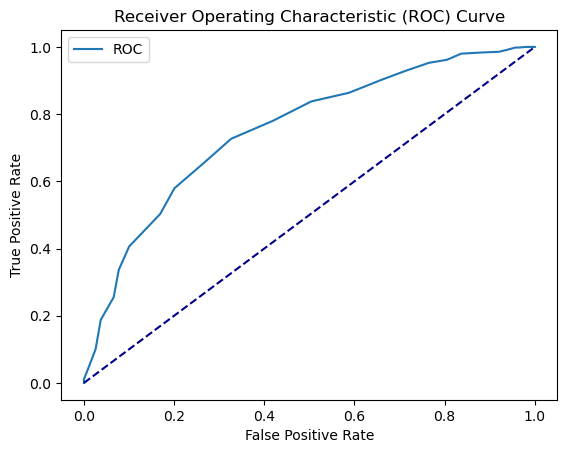

AUC: 0.75


In [70]:
model_knn = KNeighborsClassifier(n_neighbors=30) #Best model obtained in the GridSearch. That is the one with k = 30
fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

## 6.2-TREE

In [71]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,6,8,10],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}

hyperp_search(classifier,parameters)

f1_train: 0.765835 using {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10} in 6.404 seconds
           train    test 
f1         0.869    0.757
precision  0.828    0.712
accuracy   0.831    0.683
recall     0.914    0.807

[[ 731  313]
 [ 142 1505]]
[[170 179]
 [106 443]]


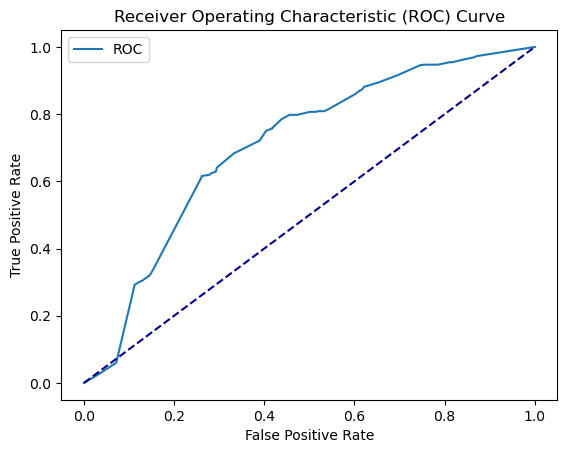

AUC: 0.71


In [72]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=5, min_samples_split=10) #Best model obtained in the GridSearch
fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)

In [73]:
#Plotting the tree
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)

#we use trees bc they are fast and simple

|--- logTotal_Pax <= 0.05
|   |--- logTotal_Pax <= -0.79
|   |   |--- MDR_High_Grade_8 <= 0.50
|   |   |   |--- Tuition <= 0.82
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- Tuition >  0.82
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- MDR_High_Grade_8 >  0.50
|   |   |   |--- logFPP_to_School_enrollment <= -0.62
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- logFPP_to_School_enrollment >  -0.62
|   |   |   |   |--- truncated branch of depth 5
|   |--- logTotal_Pax >  -0.79
|   |   |--- logTotal_School_Enrollment <= -1.52
|   |   |   |--- School_Sponsor_1 <= 0.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- School_Sponsor_1 >  0.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- logTotal_School_Enrollment >  -1.52
|   |   |   |--- logFRP_Cancelled <= 0.09
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- logFRP_Cancelled >  0.09
|   |   |   |   |--- truncated branch of depth 5
|---

## 6.3-NAIVES 

In [74]:
from sklearn.naive_bayes import GaussianNB 

model_naives = GaussianNB()

model_naives.fit(X_train, y_train)
y_pred_train = model_naives.predict(X_train)
y_pred = model_naives.predict(X_test)

#from sklearn.metrics import f1_score
print("           train    test ") 
print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
print("accuracy   %.3f    %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
print("recall     %.3f    %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))

print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred))

           train    test 
f1         0.329    0.312
precision  0.859    0.815
accuracy   0.492    0.480
recall     0.203    0.193
[[ 989   55]
 [1312  335]]
[[325  24]
 [443 106]]


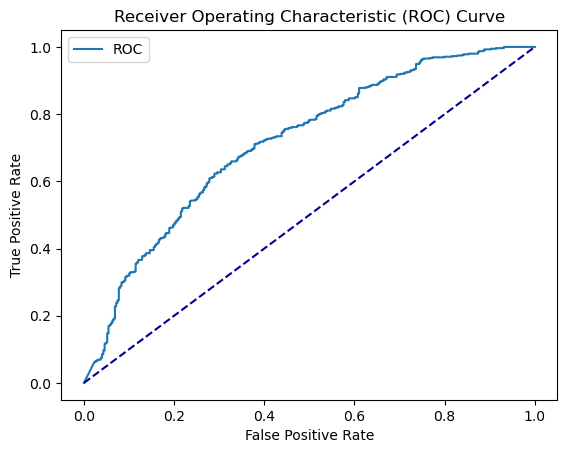

AUC: 0.72


In [75]:
y_probs = model_naives.predict_proba(X_test) #The predict_proba function provides the probability estimates for the target column (0 and 1) 
fpr3,tpr3=roc(model_naives,X_train,y_train,X_test,y_test)

## 6.4-LOGISTIC REGRESSION 

In [76]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-5,1e-4,1e-3,0.01,0.1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)

f1_train: 0.801768 using {'C': 10, 'max_iter': 1000} in 1.987 seconds
           train    test 
f1         0.839    0.820
precision  0.799    0.779
accuracy   0.793    0.767
recall     0.883    0.865

[[ 679  365]
 [ 192 1455]]
[[214 135]
 [ 74 475]]


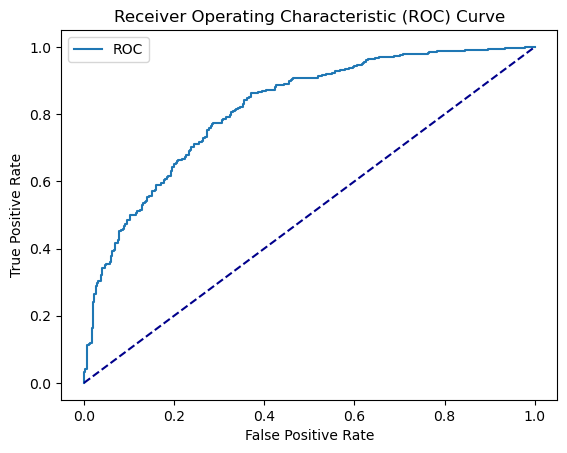

AUC: 0.82


In [77]:
model_logisticreg = LogisticRegression(C=10, max_iter=1000) #Best model obtained in the GridSearch
fpr4,tpr4=roc(model_logisticreg,X_train,y_train,X_test,y_test)

In [78]:
model_logisticreg.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model_logisticreg.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

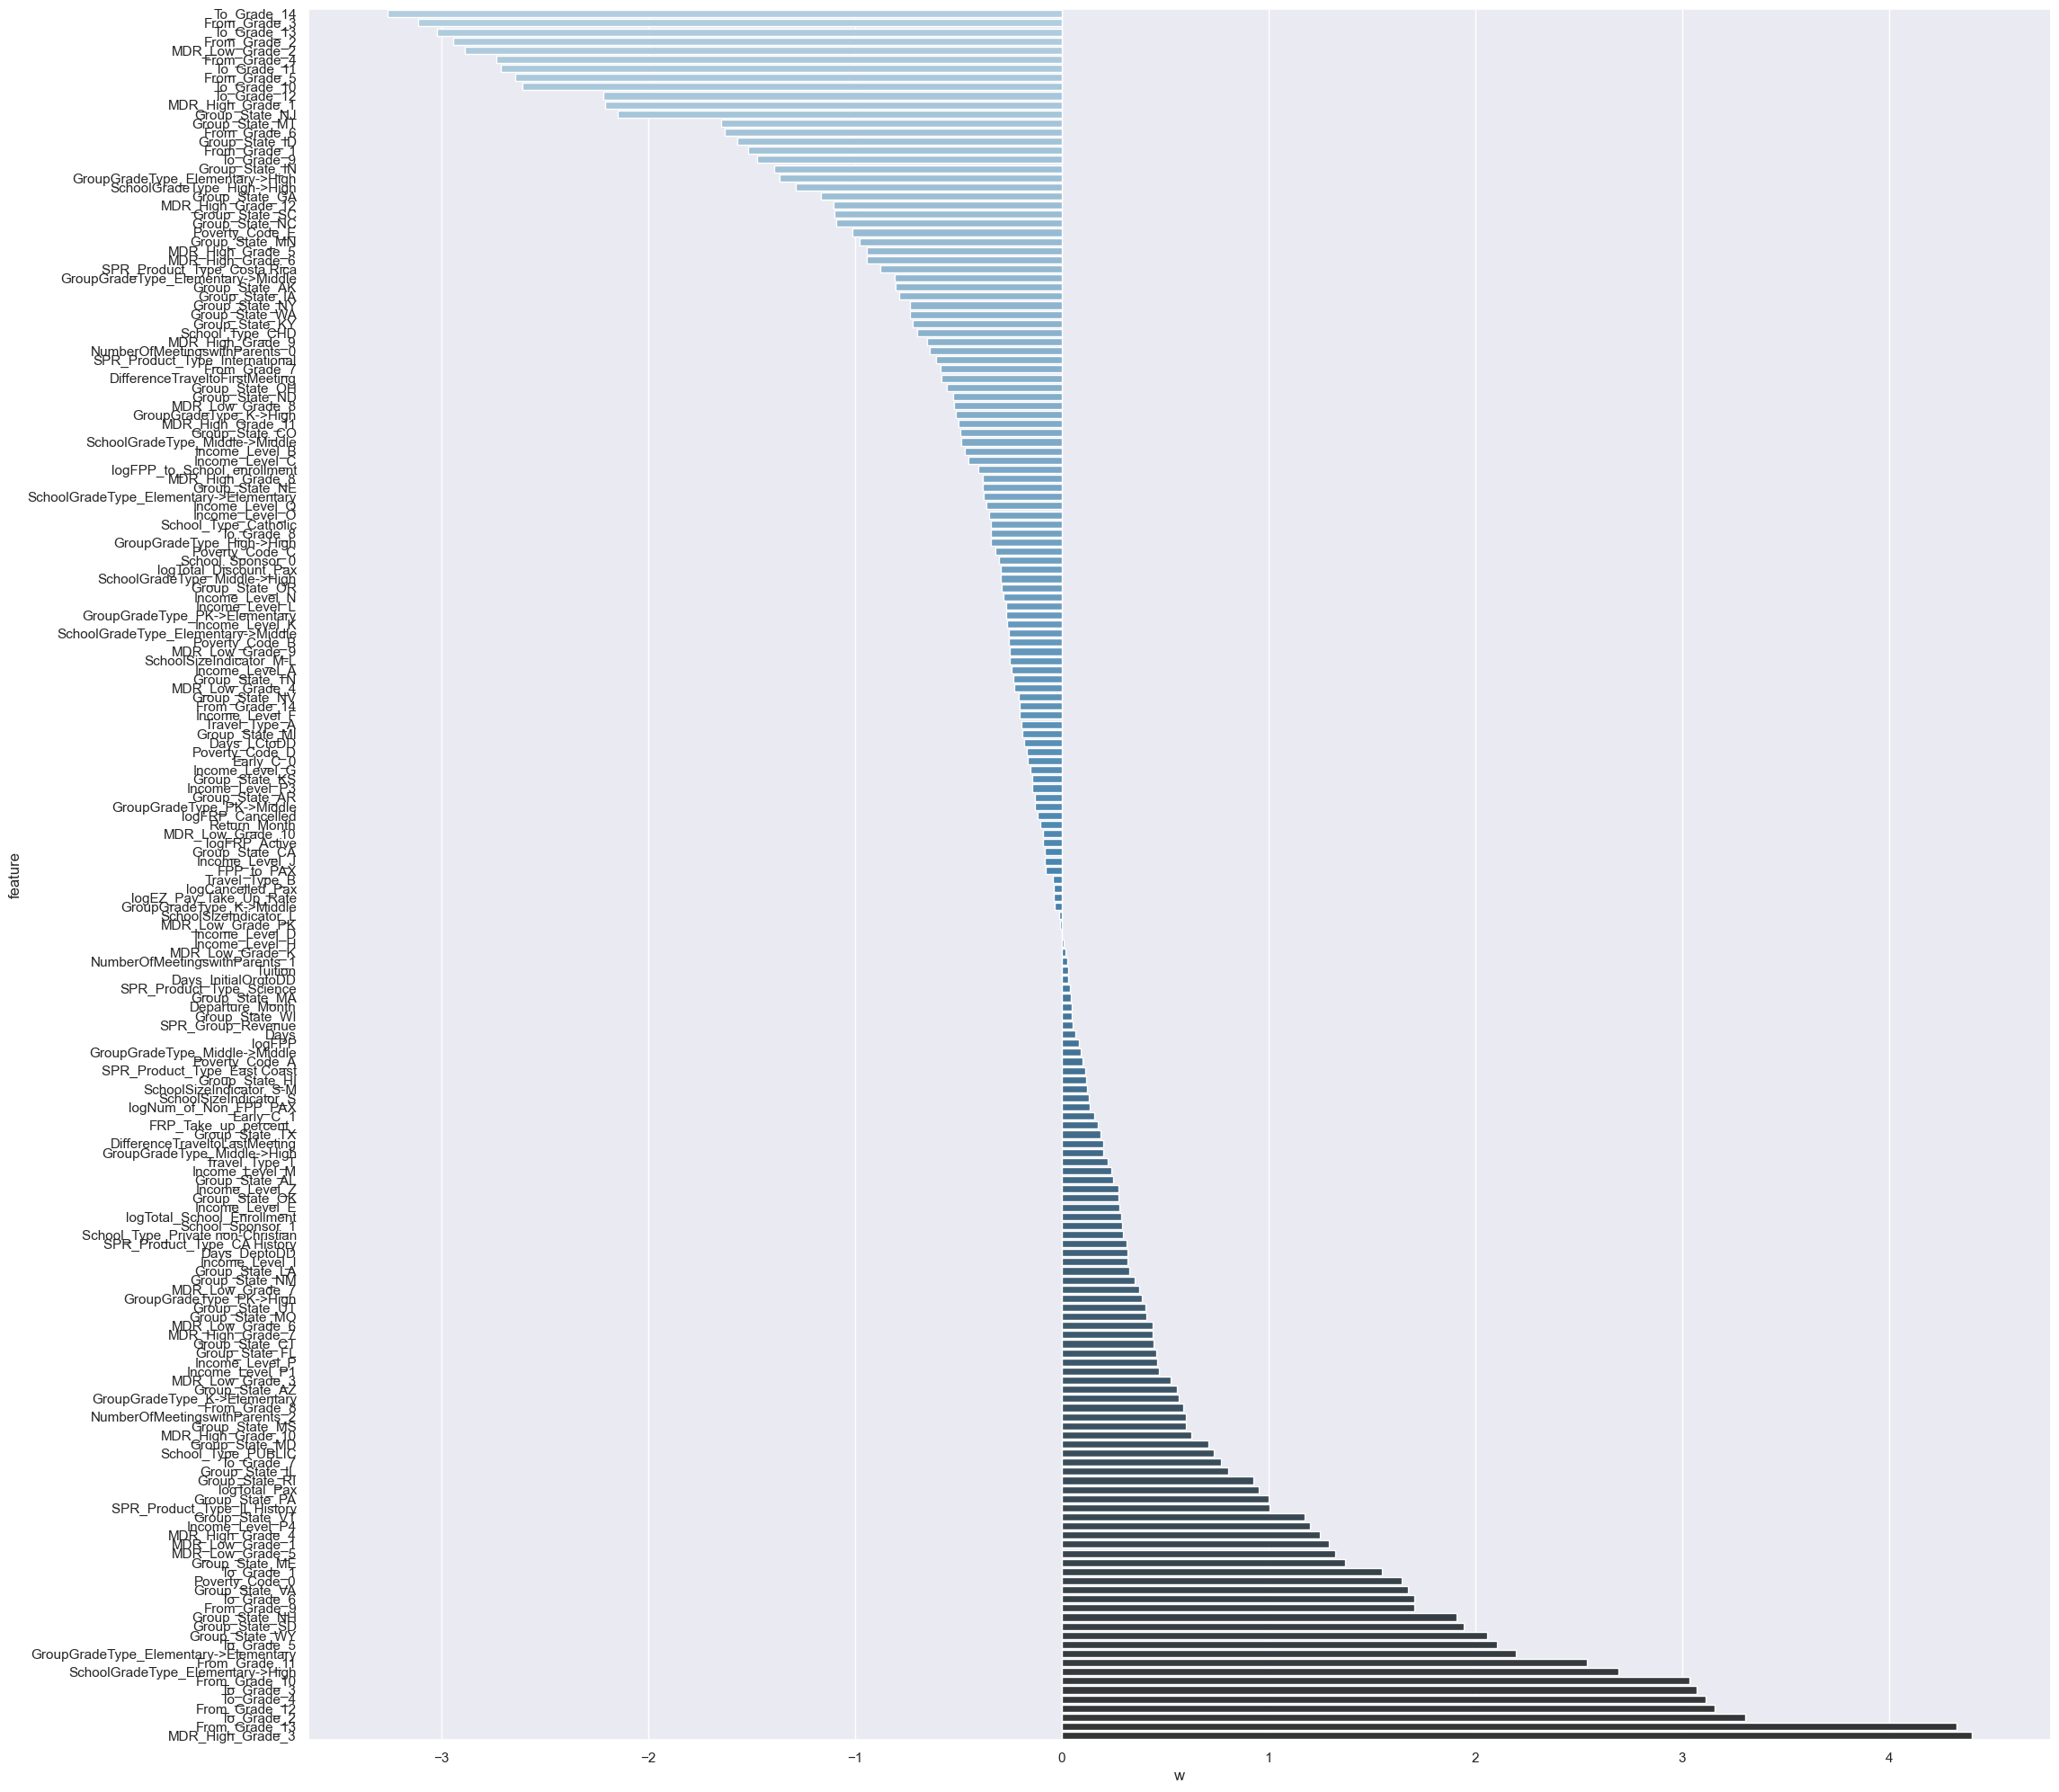

In [79]:
sns.set(rc={'figure.figsize':(25,25)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})

## 6.5-SVM

In [80]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_train: 0.850672 using {'C': 100, 'kernel': 'rbf'} in 97.237 seconds
           train    test 
f1         1.000    0.869
precision  1.000    0.855
accuracy   1.000    0.837
recall     1.000    0.883

[[1044    0]
 [   0 1647]]
[[267  82]
 [ 64 485]]


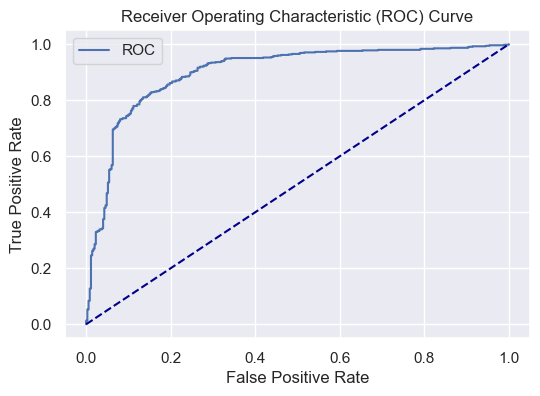

AUC: 0.90


In [81]:
model_SVC = SVC(C=100, kernel='rbf',probability=True) #Best model obtained in the GridSearch
fpr5,tpr5=roc(model_SVC,X_train,y_train,X_test,y_test)

##  6.6-MULTI-LAYER PERCEPTRON CLASSIFIER

In [82]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5), (100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

f1_train: 0.832595 using {'alpha': 0.1, 'hidden_layer_sizes': (100, 20, 5), 'max_iter': 2000} in 39.226 seconds
           train    test 
f1         1.000    0.851
precision  1.000    0.834
accuracy   1.000    0.814
recall     1.000    0.869

[[1044    0]
 [   0 1647]]
[[254  95]
 [ 72 477]]


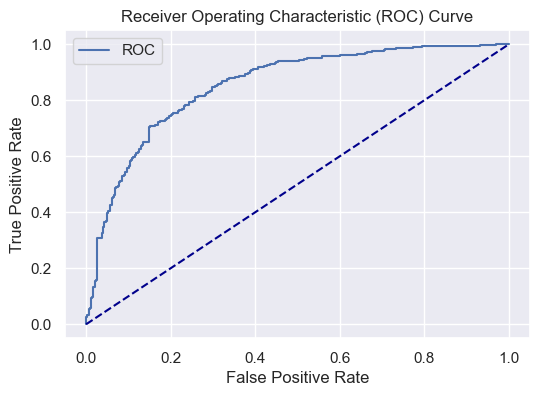

AUC: 0.85


In [83]:
model_MLP=MLPClassifier(hidden_layer_sizes=(100,20,5), alpha=0.1, max_iter=2000) #Best model obtained in the GridSearch
fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

## 6.7-ADABOOST

In [84]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
parameters = {"n_estimators":[10,30],
            "learning_rate":[0.5,1.0]}

hyperp_search(classifier,parameters)

f1_train: 0.781677 using {'learning_rate': 1.0, 'n_estimators': 30} in 1.314 seconds
           train    test 
f1         0.793    0.778
precision  0.758    0.740
accuracy   0.734    0.714
recall     0.831    0.820

[[ 608  436]
 [ 279 1368]]
[[191 158]
 [ 99 450]]


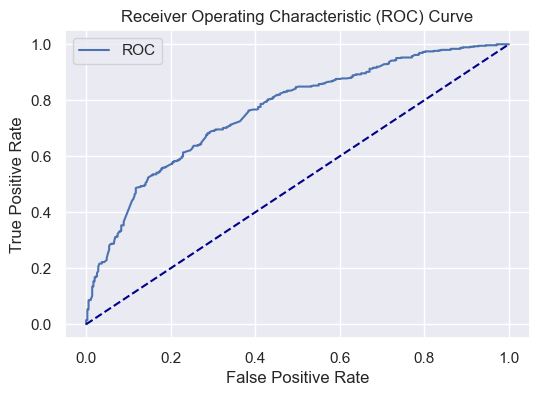

AUC: 0.76


In [85]:
model_Ada=AdaBoostClassifier(n_estimators=30, learning_rate=1.0) #Best model obtained in the GridSearch
fpr7,tpr7=roc(model_Ada,X_train,y_train,X_test,y_test)

## 6.8-RANDOM FOREST 

In [86]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
param_RF = {'criterion': ['entropy','gini'],
              'n_estimators' : [50,100,200,400],
              'max_depth': [4,5,6,7,10]}

hyperp_search(RF,param_RF)

f1_train: 0.821079 using {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 400} in 39.434 seconds
           train    test 
f1         0.933    0.817
precision  0.881    0.747
accuracy   0.913    0.753
recall     0.991    0.902

[[ 824  220]
 [  14 1633]]
[[181 168]
 [ 54 495]]


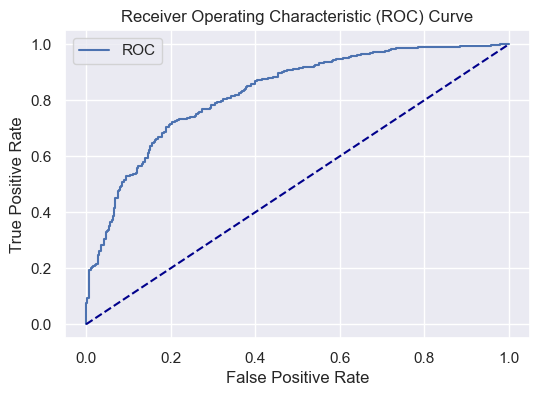

AUC: 0.83


In [87]:
model_RF=RandomForestClassifier(n_estimators=200,criterion='gini', max_depth=10) #Best model obtained in the GridSearch
fpr8,tpr8=roc(model_RF,X_train,y_train,X_test,y_test)

<AxesSubplot:>

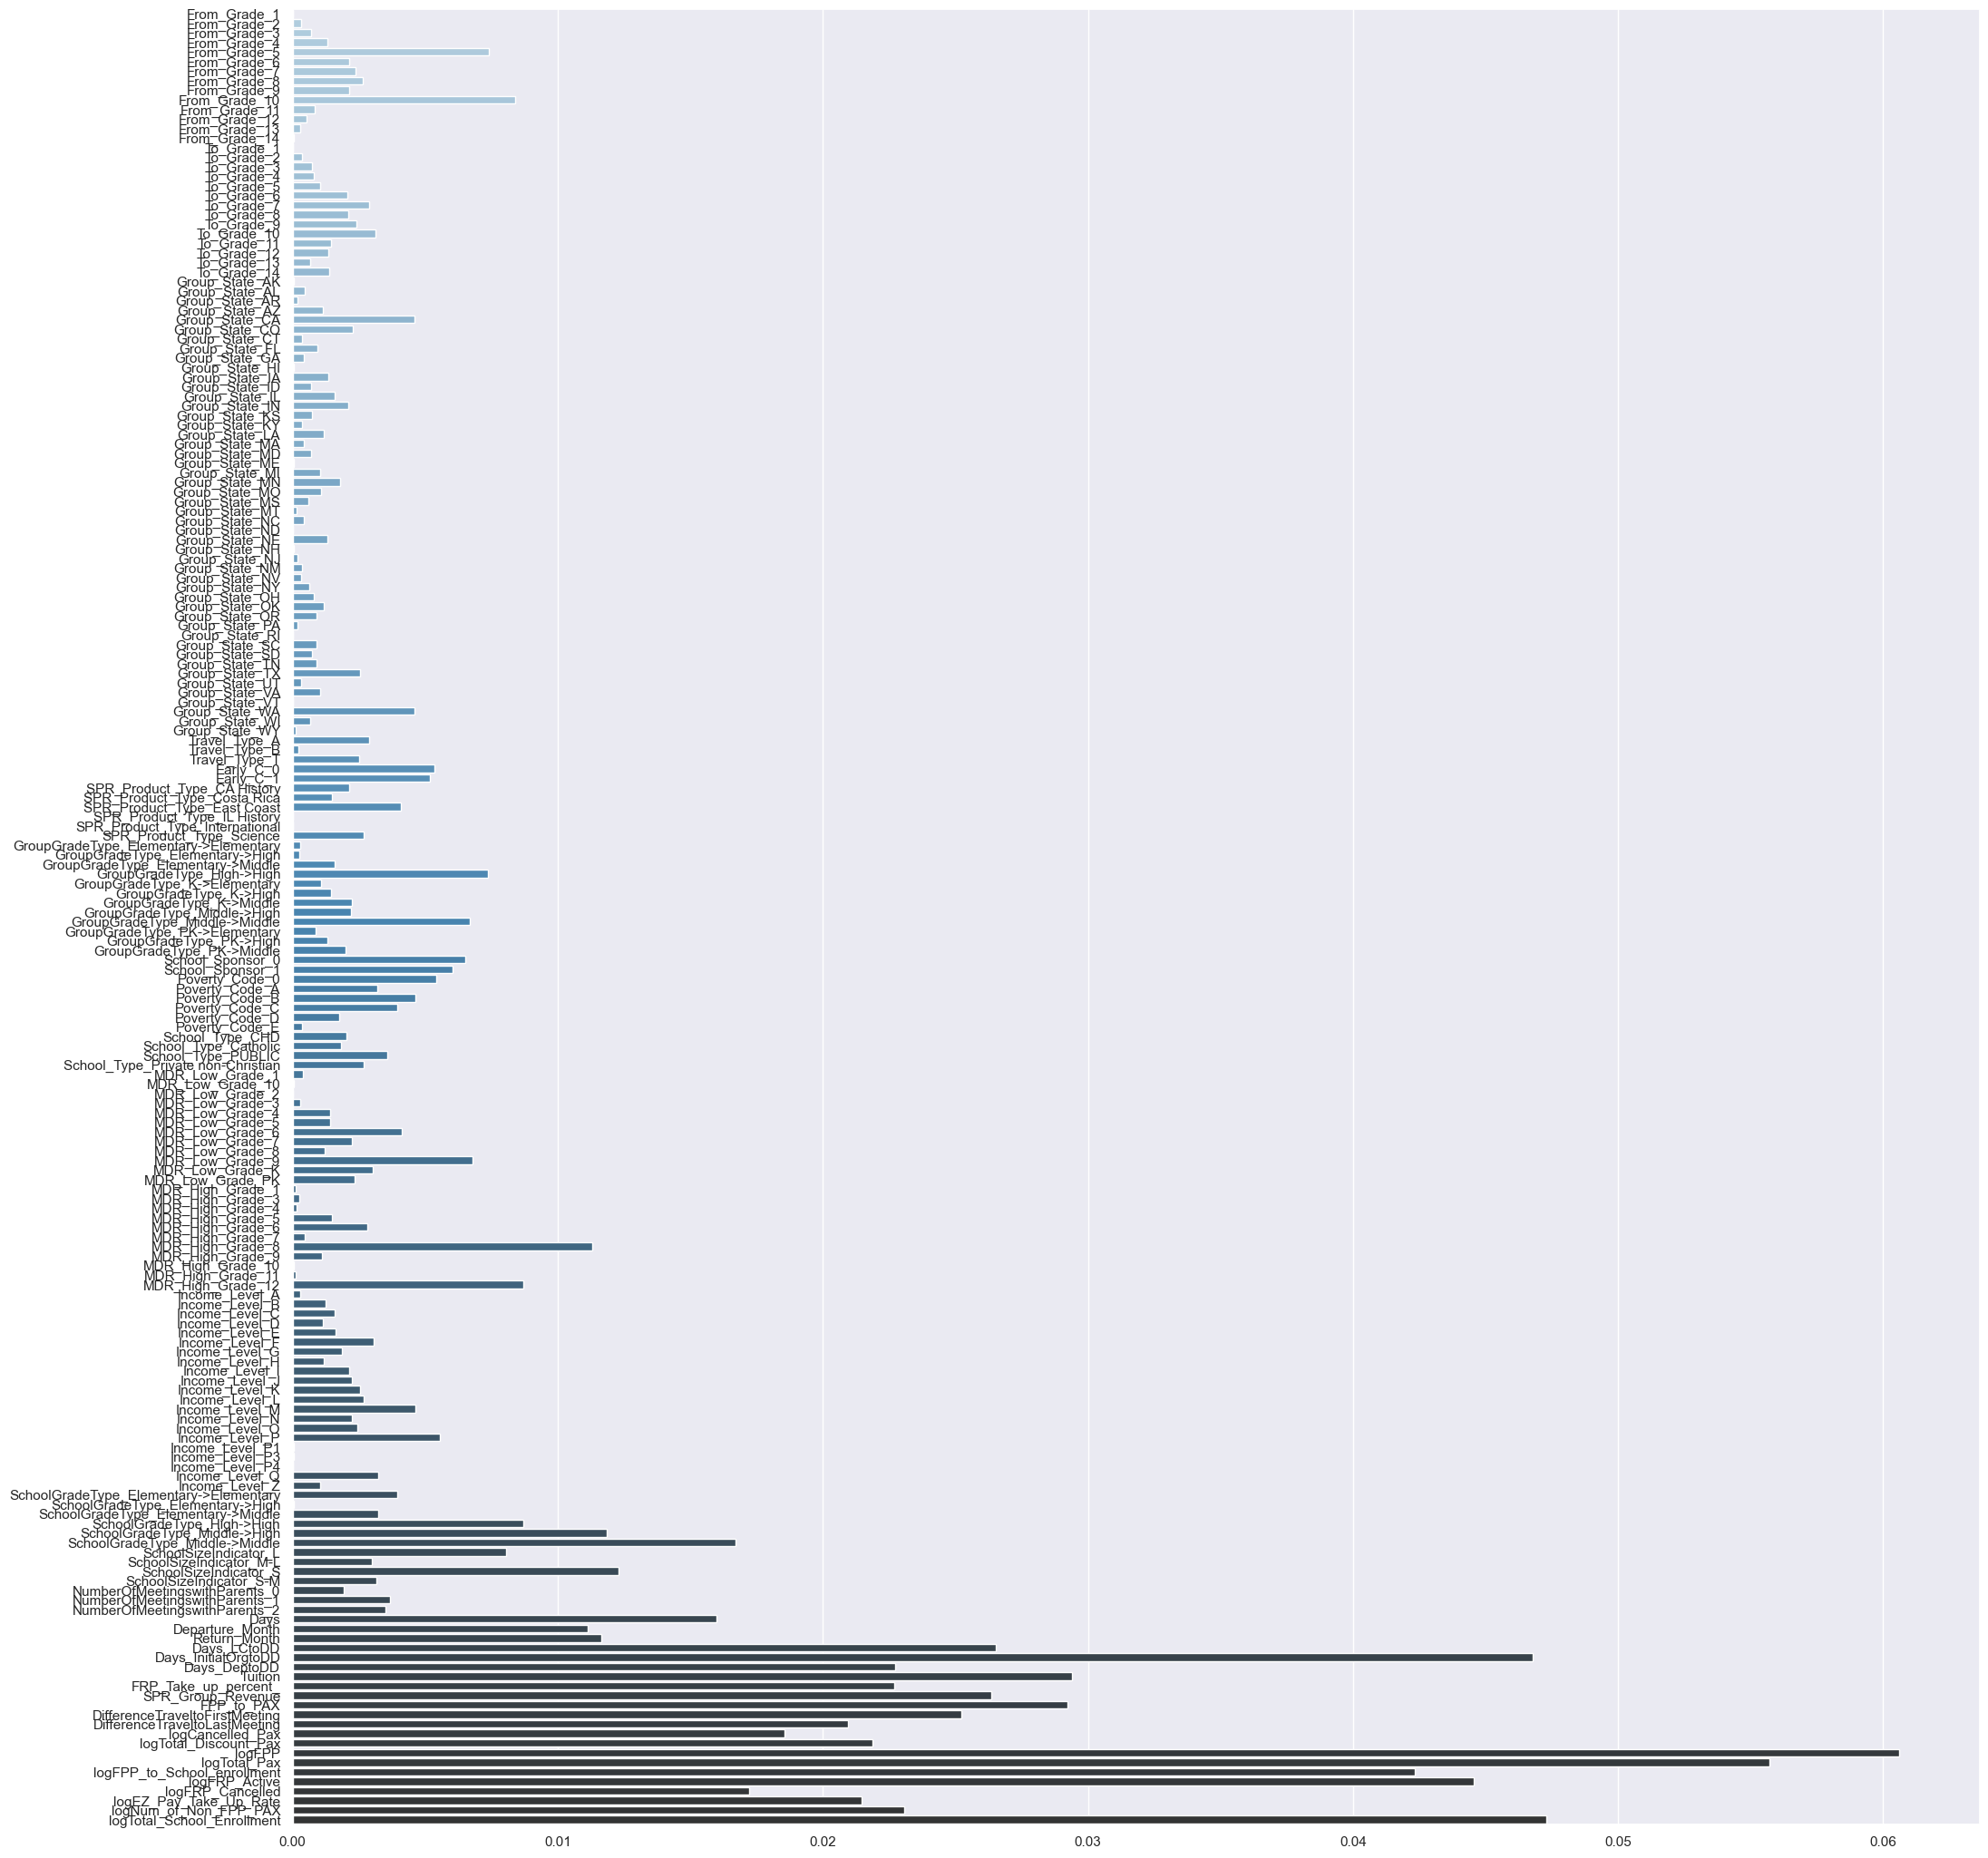

In [88]:
sns.set(rc={'figure.figsize':(24,26)})
sns.barplot(y=X_train.columns, x=model_RF.feature_importances_, palette="Blues_d", orient="h")

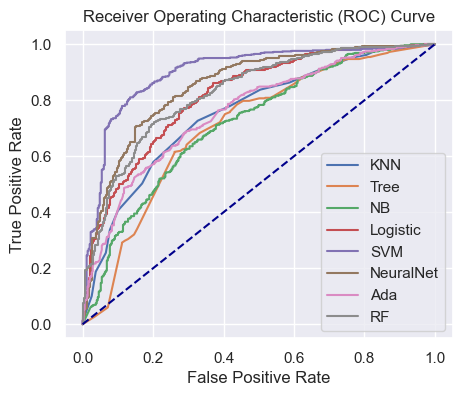

In [89]:
sns.set(rc={'figure.figsize':(5,4)})
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot(fpr7, tpr7, label= "Ada")
plt.plot(fpr8, tpr8, label= "RF")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Save the model

After several tests, trying different parameters (through GridSearch) for each of the models, we have finally decided that the best model for us is LOGISTIC REGRESSION.

This model performs very similar on both train and test set, which means that the model is not overfitted. Moreover, the metrics (f1, precision, accuracy and recall) are also high, so the number of false positives and false negatives are low.

In [90]:
import pickle
pickle.dump(model_logisticreg, open('logistic_regression_model.pkl', 'wb'))

# 7-PREDICTIONS

Before using our model on the unlabeled dataset to make predictions, we must perform the same data preprocessing (that we made on the labeled dataset to train the model) on the unlabeled dataset.

In [91]:
#Load scaler, encoder and model
loaded_encoder = pickle.load(open('encoder.pkl', 'rb')) #load preprocesing 
loaded_scaler = pickle.load(open('scaler.pkl', 'rb')) #load preprocesing
loaded_model = pickle.load(open('logistic_regression_model.pkl', 'rb')) #load model

#Import the 3 different unlabeled dataset
sales_unlabeled = pd.read_csv('sales_test.csv', delimiter =',')
finance_unlabeled = pd.read_csv('finance_test.csv', delimiter =',')
crm_unlabeled = pd.read_csv('crm_test.csv', delimiter =',')

# Extract the numerical part of each ID and store them in a new column
sales_unlabeled['ID_num_sales'] = sales_unlabeled['ID_SALES'].str.extract('(\d+)')
finance_unlabeled['ID_num_finance'] = finance_unlabeled['ID_FINANCE'].str.extract('(\d+)')
crm_unlabeled['ID_num_crm'] = crm_unlabeled['ID_CRM'].str.extract('(\d+)')

#If the numerical ID starts with 0, we remove it
remove_leading_zero_u = lambda x: x.lstrip('0')

#We create a new column with the numerical IDs without 0
sales_unlabeled['ID_without_zero'] = sales_unlabeled['ID_num_sales'].apply(remove_leading_zero_u)
finance_unlabeled['ID_without_zero'] = finance_unlabeled['ID_num_finance'].apply(remove_leading_zero_u)
crm_unlabeled['ID_without_zero'] = crm_unlabeled['ID_num_crm'].apply(remove_leading_zero_u)

#We transform the numerical IDs without 0 into int to sort them
sales_unlabeled['ID_without_zero'] = sales_unlabeled['ID_without_zero'].astype(int)
finance_unlabeled['ID_without_zero'] = finance_unlabeled['ID_without_zero'].astype(int)
crm_unlabeled['ID_without_zero'] = crm_unlabeled['ID_without_zero'].astype(int)

#We sort them 
sales_unlabeled = sales_unlabeled.sort_values(by='ID_without_zero')
finance_unlabeled = finance_unlabeled.sort_values(by='ID_without_zero')
crm_unlabeled = crm_unlabeled.sort_values(by='ID_without_zero')

#We transform them again into a string type
sales_unlabeled['ID_without_zero'] = sales_unlabeled['ID_without_zero'].astype(str)
finance_unlabeled['ID_without_zero'] = finance_unlabeled['ID_without_zero'].astype(str)
crm_unlabeled['ID_without_zero'] = crm_unlabeled['ID_without_zero'].astype(str)

#We carry out the merging through an inner join, that is only the IDs that are in common in the 3 unlabeled datasets will be merged
df0_unlabeled = pd.merge(sales_unlabeled, finance_unlabeled, on='ID_without_zero', how='inner') #We first merge sales and finance
df_unlabeled = pd.merge(df0_unlabeled, crm_unlabeled, on='ID_without_zero', how='inner') #Secondly we merge with crm

#We drop the columns that we don´t need anymore, these are the initial IDs and the numerical IDs but with the 0 of the 3 unalabeled datasets
df_unlabeled = df_unlabeled.drop(['ID_SALES','ID_num_sales','ID_FINANCE','ID_num_finance','ID_CRM','ID_num_crm'], axis = 1)

#We place the final ID column at the beginning of the dataset
col = df_unlabeled.pop('ID_without_zero')
df_unlabeled.insert(0, 'ID_without_zero', col)
df_unlabeled = df_unlabeled.rename(columns={'ID_without_zero':'final_ID'})

In [92]:
df_unlabeled.head()

,final_ID,Program_Code,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Date,Return_Date,Early_RPL,...,SPR_New_Existing,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator
0,1,HD,10.0,10.0,TN,13,T,04/18/2019,05/01/2019,05/04/2018,...,1,2,05/16/2018,09/01/2018,337.0,229.0,Middle,Middle,Middle->Middle,L
1,9,HD,7.0,8.0,TX,13,A,06/10/2019,06/23/2019,04/23/2018,...,1,1,09/06/2018,08/30/2018,277.0,284.0,Middle,Middle,Middle->Middle,S
2,15,HD,NaN,NaN,NM,18,A,06/15/2019,07/03/2019,NaN,...,0,1,11/18/2018,11/15/2018,209.0,212.0,Undefined,Undefined,Undefined->Undefined,M-L
3,19,CD,8.0,8.0,CA,21,A,05/16/2019,06/06/2019,04/30/2018,...,1,1,10/06/2018,09/27/2018,222.0,231.0,Middle,Middle,Middle->Middle,S
4,27,HD,8.0,9.0,HI,15,A,04/15/2019,04/30/2019,03/08/2018,...,0,1,10/02/2018,10/03/2018,195.0,194.0,Middle,High,Middle->High,S-M


In [93]:
print("\n".join(df_unlabeled.columns))

final_ID
Program_Code
From_Grade
To_Grade
Group_State
Days
Travel_Type
Departure_Date
Return_Date
Early_RPL
Latest_RPL
Cancelled_Pax
Total_Discount_Pax
Initial_System_Date
SPR_Product_Type
FPP
Total_Pax
DepartureMonth
GroupGradeTypeLow
GroupGradeTypeHigh
GroupGradeType
MajorProgramCode
FPP_to_School_enrollment
Unnamed: 23
Deposit_Date
Special_Pay
Tuition
FRP_Active
FRP_Cancelled
FRP_Take_up_percent_
EZ_Pay_Take_Up_Rate
School_Sponsor
SPR_Group_Revenue
FPP_to_PAX
Num_of_Non_FPP_PAX
Poverty_Code
Region
CRM_Segment
School_Type
Parent_Meeting_Flag
MDR_Low_Grade
MDR_High_Grade
Total_School_Enrollment
Income_Level
SPR_New_Existing
NumberOfMeetingswithParents
FirstMeeting
LastMeeting
DifferenceTraveltoFirstMeeting
DifferenceTraveltoLastMeeting
SchoolGradeTypeLow
SchoolGradeTypeHigh
SchoolGradeType
SchoolSizeIndicator


In [94]:
df_unlabeled = df_unlabeled.drop(['Unnamed: 23'], axis =1) #Exploring the unlabeled dataset, we found out a column that is empty and that is not in the labeled dataset, so we drop it

In [95]:
df_unlabeled.shape

(609, 53)

In [96]:
#Date columns to datetime format
df_unlabeled['Departure_Date'] = pd.to_datetime(df_unlabeled['Departure_Date'])
df_unlabeled['Return_Date'] = pd.to_datetime(df_unlabeled['Return_Date'])
df_unlabeled['Early_RPL'] = pd.to_datetime(df_unlabeled['Early_RPL'])
df_unlabeled['Latest_RPL'] = pd.to_datetime(df_unlabeled['Latest_RPL'])
df_unlabeled['Initial_System_Date'] = pd.to_datetime(df_unlabeled['Initial_System_Date'])
df_unlabeled['Deposit_Date'] = pd.to_datetime(df_unlabeled['Deposit_Date'])
df_unlabeled['FirstMeeting'] = pd.to_datetime(df_unlabeled['FirstMeeting'])
df_unlabeled['LastMeeting'] = pd.to_datetime(df_unlabeled['LastMeeting'])

#We obtain the months of departure and return date
df_unlabeled['Departure_Month'] = df_unlabeled['Departure_Date'].dt.month
df_unlabeled['Return_Month'] = df_unlabeled['Return_Date'].dt.month

#Dys between different dates and departure date
df_unlabeled['Days_LCtoDD'] = (df_unlabeled['Departure_Date'] - df_unlabeled['Latest_RPL']).dt.days #This column reflects the number of days between the last communication of the trip and the departure date
df_unlabeled['Days_InitialOrgtoDD'] = (df_unlabeled['Departure_Date'] - df_unlabeled['Initial_System_Date']).dt.days #This column reflects the number of days between the date when the trip was organized and the departure date
df_unlabeled['Days_DeptoDD'] = (df_unlabeled['Departure_Date'] - df_unlabeled['Deposit_Date']).dt.days #This columns reflects the number of days between the deposit date and the departure date
df_unlabeled['Early_C'] = df_unlabeled['Early_RPL'].notna().astype(int) #This column is a flag that indicates whether there has been two communications or not. 1 for two communications, 0 for one communications

#We place the recently created columns in the position where they belong
col1 = df_unlabeled.pop('Early_C')
col2 = df_unlabeled.pop('Days_LCtoDD')
col3 = df_unlabeled.pop('Days_InitialOrgtoDD')
col4 = df_unlabeled.pop('Departure_Month')
col5 = df_unlabeled.pop('Return_Month')
col6 = df_unlabeled.pop('Days_DeptoDD')
df_unlabeled.insert(9, 'Early_C', col1)
df_unlabeled.insert(10, 'Days_LCtoDD', col2)
df_unlabeled.insert(15, 'Days_InitialOrgtoDD', col3)
df_unlabeled.insert(7, 'Departure_Month', col4)
df_unlabeled.insert(8, 'Return_Month', col5)
df_unlabeled.insert(29, 'Days_DeptoDD', col6)

#Drop the columns that we are not going to use
df_unlabeled = df_unlabeled.drop(['Program_Code','Departure_Date','Return_Date','Deposit_Date',
                                  'Early_RPL','Latest_RPL','Initial_System_Date','DepartureMonth',
                                  'GroupGradeTypeLow','GroupGradeTypeHigh','MajorProgramCode','Deposit_Date',
                                  'Special_Pay','Region','CRM_Segment','Parent_Meeting_Flag','FirstMeeting',
                                  'LastMeeting','SchoolGradeTypeLow','SchoolGradeTypeHigh', 'Special_Pay'],axis =1)

In [97]:
df_unlabeled[df_unlabeled.duplicated()] #We check which are the rows that are duplicates

,final_ID,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Month,Return_Month,Early_C,Days_LCtoDD,...,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,Income_Level,SPR_New_Existing,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeType,SchoolSizeIndicator


There are no duplicates

In [98]:
df_unlabeled["DifferenceTraveltoFirstMeeting"].fillna(0, inplace=True)
df_unlabeled["DifferenceTraveltoLastMeeting"].fillna(0, inplace=True)
df_unlabeled.dropna(inplace=True)

In [99]:
#Now that we have drop all the missing data, we can perform the transformations needed for each column
df_unlabeled['final_ID'] = df_unlabeled['final_ID'].astype('object')
df_unlabeled['Early_C'] = df_unlabeled['Early_C'].astype('object')
df_unlabeled['Days_LCtoDD'] = df_unlabeled['Days_LCtoDD'].astype('int64')
df_unlabeled['Days_InitialOrgtoDD'] = df_unlabeled['Days_InitialOrgtoDD'].astype('int64')
df_unlabeled['DifferenceTraveltoFirstMeeting'] = df_unlabeled['DifferenceTraveltoFirstMeeting'].astype('int64')
df_unlabeled['DifferenceTraveltoLastMeeting'] = df_unlabeled['DifferenceTraveltoLastMeeting'].astype('int64')
df_unlabeled['From_Grade'] = df_unlabeled['From_Grade'].astype('int64')
df_unlabeled['From_Grade'] = df_unlabeled['From_Grade'].astype('object')
df_unlabeled['To_Grade'] = df_unlabeled['To_Grade'].astype('int64')
df_unlabeled['To_Grade'] = df_unlabeled['To_Grade'].astype('object')
df_unlabeled['MDR_High_Grade'] = df_unlabeled['MDR_High_Grade'].astype('int64')
df_unlabeled['MDR_High_Grade'] = df_unlabeled['MDR_High_Grade'].astype('object')
df_unlabeled['School_Sponsor'] = df_unlabeled['School_Sponsor'].astype('object')
df_unlabeled['SPR_New_Existing'] = df_unlabeled['SPR_New_Existing'].astype('object')
df_unlabeled['NumberOfMeetingswithParents'] = df_unlabeled['NumberOfMeetingswithParents'].astype('object')

df_unlabeled = df_unlabeled.loc[df_unlabeled['Days_LCtoDD'] >= 0] #Drop the rows in which the values of Days_LCtoDD are negative
df_unlabeled = df_unlabeled.loc[df_unlabeled['Days_InitialOrgtoDD'] >= 0] #Drop the rows in which the values of Days_InitialOrgtoDD are negative
df_unlabeled = df_unlabeled.loc[df_unlabeled['DifferenceTraveltoFirstMeeting'] >= 0] #Drop the rows in which the values of DifferenceTraveltoFirstMeeting are negative
df_unlabeled = df_unlabeled.loc[df_unlabeled['DifferenceTraveltoLastMeeting'] >= 0] #Drop the rows in which the values of DifferenceTraveltoLastMeeting are negative
df_unlabeled = df_unlabeled.loc[df_unlabeled['FPP_to_School_enrollment'] <= 1] # Drop the rows in which the values of FPP_to_School_enrollment are larger than 1
df_unlabeled = df_unlabeled.loc[df_unlabeled['Days_DeptoDD'] >= 0] #Drop the rows in which the values of Days_DeptotoDD are negative
df_unlabeled = df_unlabeled.loc[df_unlabeled['FRP_Take_up_percent_'] <= 1] # Drop the rows in which the values of FRP_Take_up_percent_ are larger than 1
df_unlabeled = df_unlabeled.loc[df_unlabeled['EZ_Pay_Take_Up_Rate'] <= 1] # Drop the rows in which the values of EZ_Pay_Take_Up_Rate are larger than 1
df_unlabeled = df_unlabeled.loc[df_unlabeled['FPP_to_PAX'] <= 1] # Drop the rows in which the values of FPP_to_PAX are larger than 1

In [100]:
df_unlabeled.head()

,final_ID,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Month,Return_Month,Early_C,Days_LCtoDD,...,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,Income_Level,SPR_New_Existing,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeType,SchoolSizeIndicator
0,1,10,10,TN,13,T,4,5,1,236,...,6,12,925,N,1,2,337,229,Middle->Middle,L
1,9,7,8,TX,13,A,6,6,1,279,...,6,8,185,Z,1,1,277,284,Middle->Middle,S
3,19,8,8,CA,21,A,5,6,1,283,...,PK,8,238,P,1,1,222,231,Middle->Middle,S
4,27,8,9,HI,15,A,4,4,1,211,...,6,8,581,M,0,1,195,194,Middle->High,S-M
5,39,9,10,IL,8,A,6,6,0,271,...,6,8,194,P,1,2,271,11,Middle->Middle,S


In [101]:
df_unlabeled.shape

(570, 40)

In [102]:
df_unlabeled.to_csv('final_unlabeled.csv',index=False)

In [103]:
df_unlabeled_numerical=df_unlabeled.select_dtypes(include=[np.number]) #selecting the columns that are numerical
df_unlabeled_categorical=df_unlabeled.select_dtypes(include=['object']) #selecting the columns that are categorical

#Categorical
#We obtain the dummies for the unlabeled dataset
selection_categorical=['From_Grade','To_Grade','Group_State','Travel_Type','Early_C','SPR_Product_Type', 'GroupGradeType', 'School_Sponsor', 
                       'Poverty_Code','School_Type','MDR_Low_Grade', 'MDR_High_Grade',
                       'Income_Level','SchoolGradeType','SchoolSizeIndicator','NumberOfMeetingswithParents']

dummies_unlabeled = loaded_encoder.transform(df_unlabeled_categorical[selection_categorical]).toarray()
columns_dummies=loaded_encoder.get_feature_names_out()
dummies_unlabeled =pd.DataFrame(dummies_unlabeled,columns=columns_dummies)

#Numerical

import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

df_unlabeled_numerical['logCancelled_Pax']=df_unlabeled_numerical['Cancelled_Pax'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logTotal_Discount_Pax']=df_unlabeled_numerical['Total_Discount_Pax'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logFPP']=df_unlabeled_numerical['FPP'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logTotal_Pax']=df_unlabeled_numerical['Total_Pax'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logFPP_to_School_enrollment']=df_unlabeled_numerical['FPP_to_School_enrollment'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logFRP_Active']=df_unlabeled_numerical['FRP_Active'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logFRP_Cancelled']=df_unlabeled_numerical['FRP_Cancelled'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logEZ_Pay_Take_Up_Rate']=df_unlabeled_numerical['EZ_Pay_Take_Up_Rate'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logNum_of_Non_FPP_PAX']=df_unlabeled_numerical['Num_of_Non_FPP_PAX'].apply(lambda x: math.log(x+1))
df_unlabeled_numerical['logTotal_School_Enrollment']=df_unlabeled_numerical['Total_School_Enrollment'].apply(lambda x: math.log(x+1))


df_unlabeled_numerical.drop(columns=['Cancelled_Pax','Total_Discount_Pax','FPP','Total_Pax','FPP_to_School_enrollment','FRP_Active','FRP_Cancelled','EZ_Pay_Take_Up_Rate','Num_of_Non_FPP_PAX','Total_School_Enrollment'],inplace=True)

#Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!

scaled_df_unlabeled_numerical = pd.DataFrame(loaded_scaler.transform(df_unlabeled_numerical))
scaled_df_unlabeled_numerical.columns = df_unlabeled_numerical.columns

In [104]:
dummies_unlabeled.shape

(570, 168)

In [105]:
df_unlabeled_numerical.shape

(570, 22)

In [106]:
#We concatenate the dummies and the scaled numerical columns
X2=pd.concat([dummies_unlabeled,scaled_df_unlabeled_numerical], axis = 1)

In [107]:
X2.head()

,From_Grade_1,From_Grade_2,From_Grade_3,From_Grade_4,From_Grade_5,From_Grade_6,From_Grade_7,From_Grade_8,From_Grade_9,From_Grade_10,...,logCancelled_Pax,logTotal_Discount_Pax,logFPP,logTotal_Pax,logFPP_to_School_enrollment,logFRP_Active,logFRP_Cancelled,logEZ_Pay_Take_Up_Rate,logNum_of_Non_FPP_PAX,logTotal_School_Enrollment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.160251,-0.254990,-0.042152,0.075318,-0.627562,0.338323,0.562511,1.496386,-0.261823,0.865036
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.129157,-0.254990,-0.219470,-0.300963,0.332827,-0.028077,0.274011,-0.392884,-0.261823,-1.658254
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.129157,-1.040757,-1.978283,-1.939542,-0.792797,-1.486385,-0.622151,0.616949,-1.048687,-1.264122
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.502268,-1.040757,-1.978283,-1.939542,-0.970735,-0.949024,-0.097930,2.062940,-1.048687,0.134985
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.927121,-1.040757,-0.867562,-0.656644,0.146630,-0.330704,-1.518313,0.936315,-1.048687,-1.583972


In [108]:
X2.shape

(570, 190)

In [109]:
#We finally obtain the predictions using the Logistic Regression model
predictions = loaded_model.predict(X2)

In [110]:
predictions =pd.DataFrame(predictions, columns = ['Prediction'])

In [111]:
predictions

,Prediction
0,1
1,1
2,1
3,0
4,1
...,...
565,1
566,0
567,1
568,1


In [112]:
predictions.to_csv('predictions.csv', index =False)

In [113]:
import shap 

# compute SHAP values
shap.initjs()

X_train_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(model_logisticreg.predict_proba,X_train_summary)
shap_values = explainer.shap_values(X_train_summary)

X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pip

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

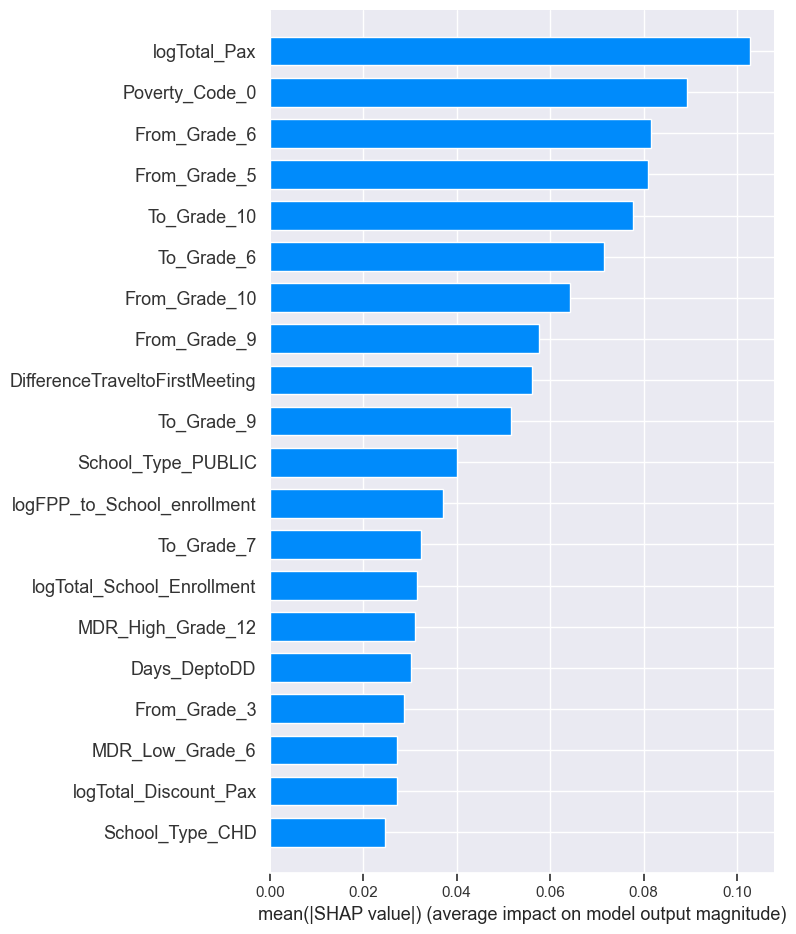

In [114]:
shap.summary_plot(shap_values[0], X_train_summary, plot_type="bar", feature_names=list(X_train.columns))

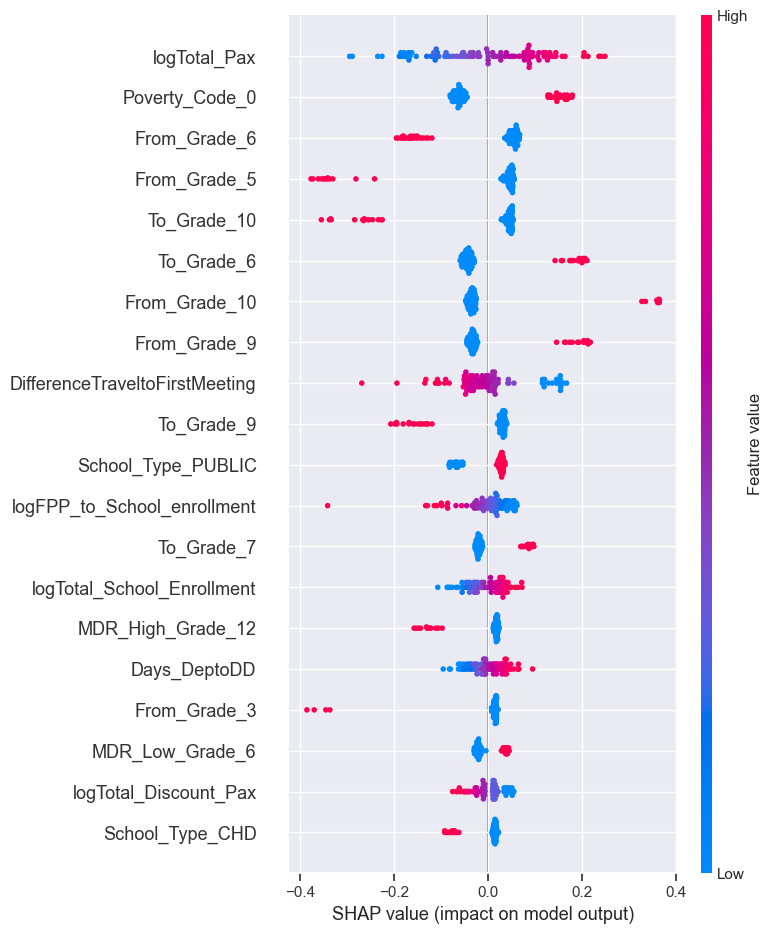

In [116]:
shap.summary_plot(shap_values[1],X_train_summary , feature_names=list(X_train.columns), max_display=20)